In [1]:
#explore different features for conversation booking rate prediction
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pylab as pl
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import analytics_lib
from analytics_lib import Bucket_BR_Plot
from analytics_lib.add_column import add_column
import modeldata
from modeldata.importdata import *
from analytics_lib.GenerateCBRCI import GenerateCBRCI
from analytics_lib.EvalLRModel import EvalLRModel
from analytics_lib.get_training_conversation import get_training_conversation
from analytics_lib.model_display_suite import display_model_coef
from analytics_lib.Bucket_BR_Plot import Bucket_BR_Plot
plt.style.use('seaborn')

In [2]:
data_dir = '/Users/wendyshi/Development/Post_DV_Data'
reset_switch = True
slug = 'drop-in'
date_stamp = '2017-07-01'

## Read in data

In [3]:
feature_df_fn = os.path.join(data_dir,'DB_training_post_'+date_stamp+'.csv')
sitter_global_training = pd.read_csv(feature_df_fn)

In [4]:
ob = get_training_conversation(sitter_global_training,exclude=False,service=slug)

In [5]:
ob_raw_fea = ['sitter_response_pct',
 'service_response_pct','signup_reason',
 'expected_earnings',
 'available_all_days',
 'rover_training',
 'lessonly_training',
 'background_check_taken',
 'has_insurance',
 'num_testimonials',
 'profile_quality',
 'facebook_connected',
 'num_pets',
 'small_dogs',
 'medium_dogs',
 'large_dogs',
 'giant_dogs',
 'dogs_experience_len',
 'description_len',
 'num_images',
 'avg_testimonial_len',
 'avg_image_resolution',
 'gender',
 'years_of_experience',
 'donation',
 'app_downloaded',
 'verified_by',
 'used_rover_to_find_sitter',
 'building_type',
 'yard_type',
 'inspected_home',
 'avg_service_response_seconds',
 'avg_sitter_response_seconds',
 'first_booking',
 'second_booking',
 'third_booking',
 'first_request',
 'second_request',
 'third_request',
 'rover_imported_ratio','calendar_recency','provider_cbr_all','rover_imported_ratio_x_cbr','no_previous_request']

## Get basic prevalence and statistics

max_clip is 1.0


/Users/wendyshi/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


'Feature :: sitter_response_pct_clipped'

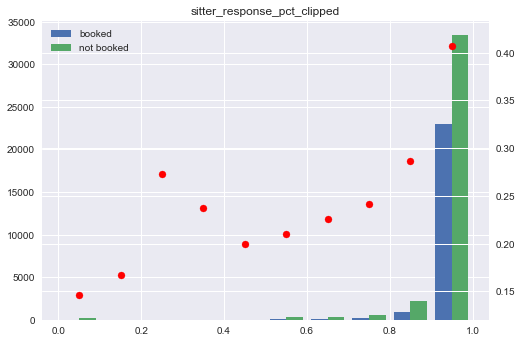

'prevalence is 0.996430899609'

'=================================================================='

max_clip is 1.0


'Feature :: service_response_pct_clipped'

analytics_lib/Bucket_BR_Plot.py:29: RuntimeWarning: invalid value encountered in divide
  h_ratio = h[0].astype(float)/(h[1]+h[0]).astype(float)


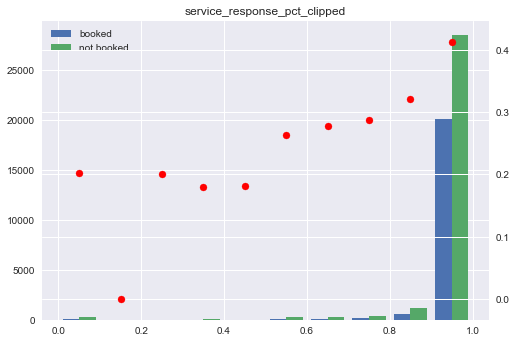

'prevalence is 0.994387421674'

'=================================================================='

signup_reason


,count,mean
signup_reason,,
expand-my-business,1925,0.400519
extra-income,38233,0.401538
fun,8705,0.378863
short-term-extra-cash,3023,0.360238
sole-source-of-income,6835,0.399122


'=================================================================='

expected_earnings


,count,mean
expected_earnings,,
125-400,30412,0.395831
1525-2500,1626,0.402214
2525-4000,871,0.382319
425-825,9711,0.398517
850-1500,4423,0.411485
<100,11080,0.386191
>4025,598,0.408027


'=================================================================='

'Feature :: available_all_days'

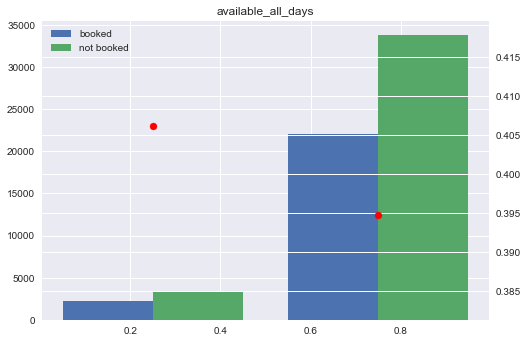

'prevalence is 0.909615384615'

'=================================================================='

'Feature :: rover_training'

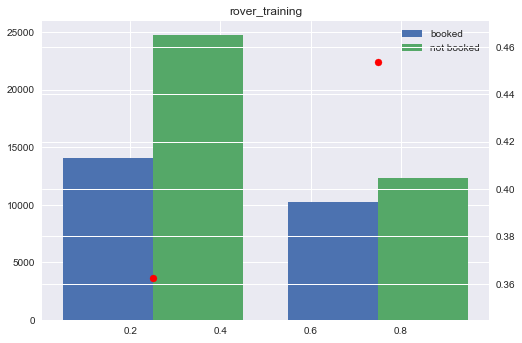

'prevalence is 0.368057366362'

'=================================================================='

'Feature :: lessonly_training'

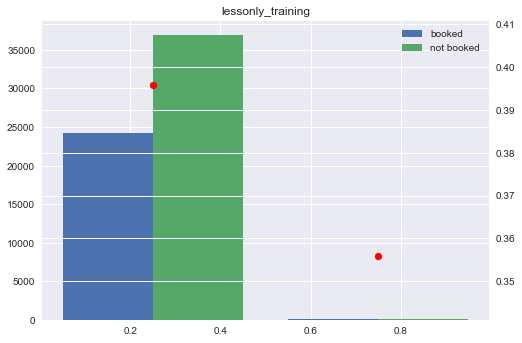

'prevalence is 0.00361799217731'

'=================================================================='

'Feature :: background_check_taken'

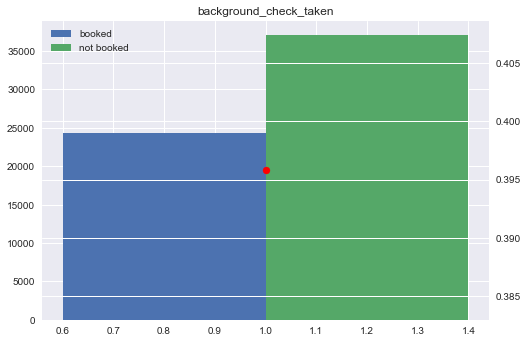

'prevalence is 1.0'

'=================================================================='

'Feature :: has_insurance'

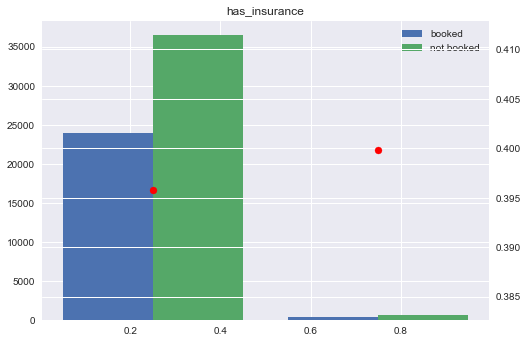

'prevalence is 0.0161016949153'

'=================================================================='

max_clip is 4.0


'Feature :: num_testimonials_clipped'

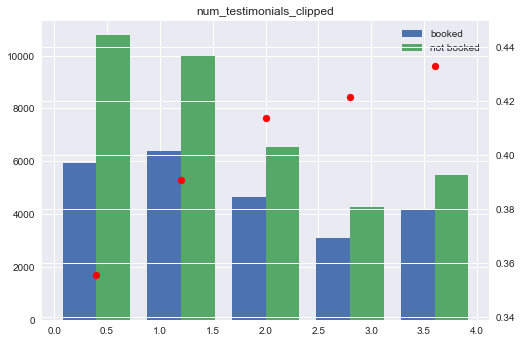

'prevalence is 0.727314211213'

'=================================================================='

max_clip is 0.0


'Feature :: profile_quality_clipped'

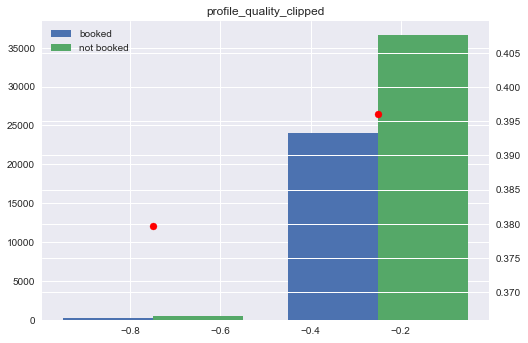

'prevalence is 0.0118481095176'

'=================================================================='

'Feature :: facebook_connected'

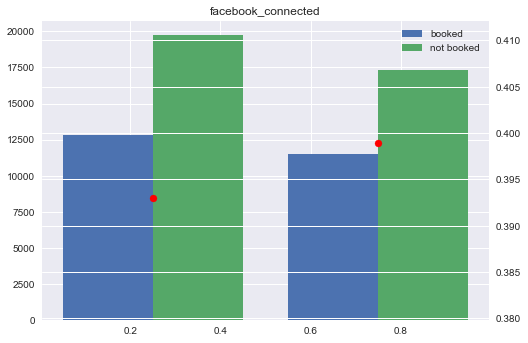

'prevalence is 0.469784876141'

'=================================================================='

max_clip is 2.0


'Feature :: num_pets_clipped'

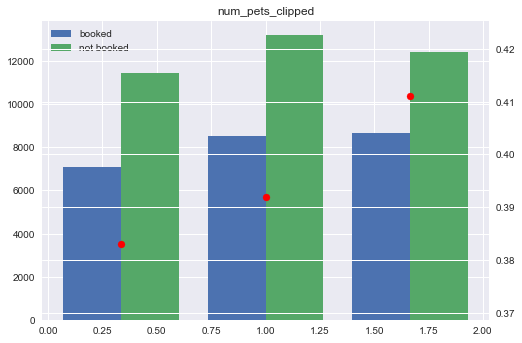

'prevalence is 0.697718383312'

'=================================================================='

'Feature :: small_dogs'

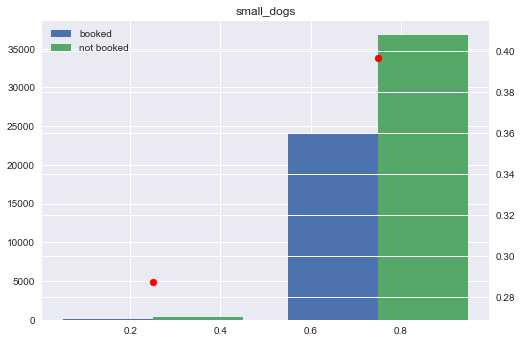

'prevalence is 0.992796610169'

'=================================================================='

'Feature :: medium_dogs'

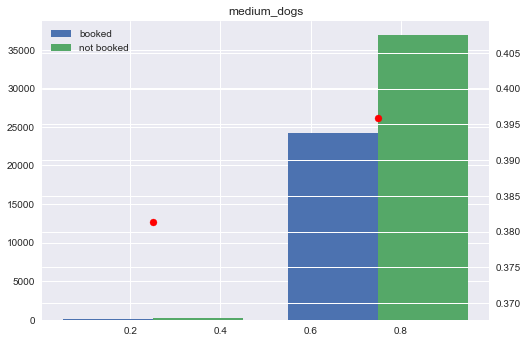

'prevalence is 0.995127118644'

'=================================================================='

'Feature :: large_dogs'

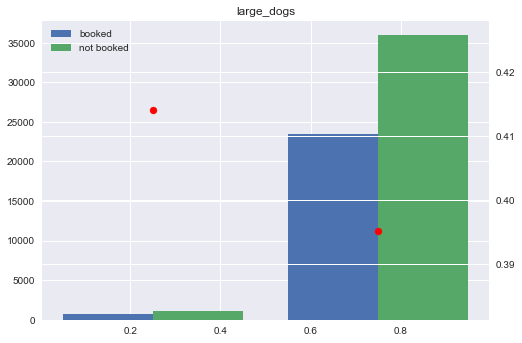

'prevalence is 0.9689863103'

'=================================================================='

'Feature :: giant_dogs'

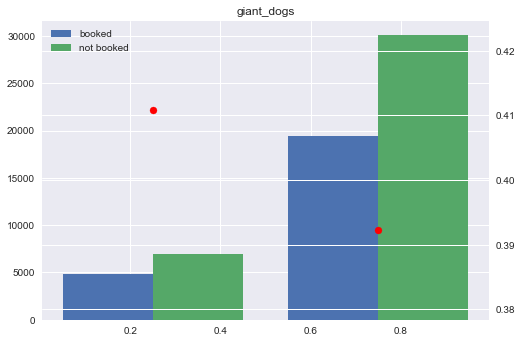

'prevalence is 0.806714471969'

'=================================================================='

max_clip is 330.0


'Feature :: dogs_experience_len_clipped'

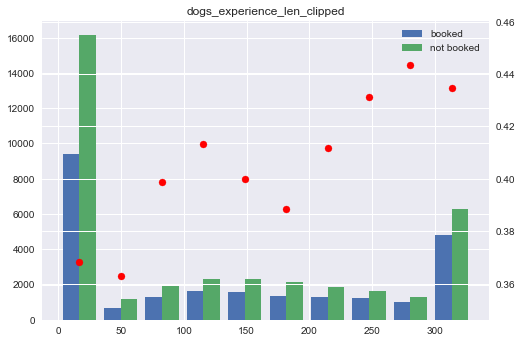

'prevalence is 0.589830508475'

'=================================================================='

max_clip is 1219.0


'Feature :: description_len_clipped'

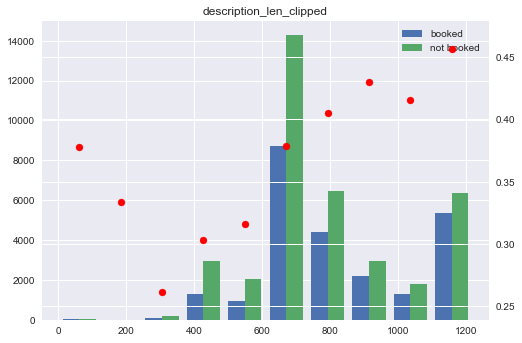

'prevalence is 0.999331812256'

'=================================================================='

max_clip is 22.0


'Feature :: num_images_clipped'

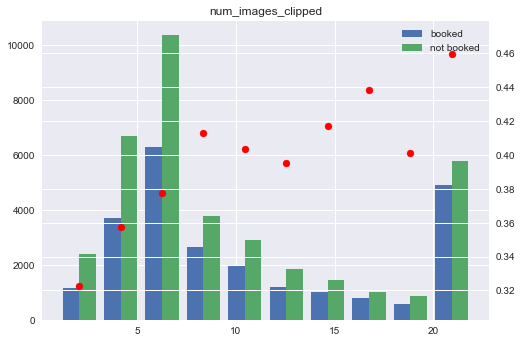

'prevalence is 1.0'

'=================================================================='

max_clip is 473.0


'Feature :: avg_testimonial_len_clipped'

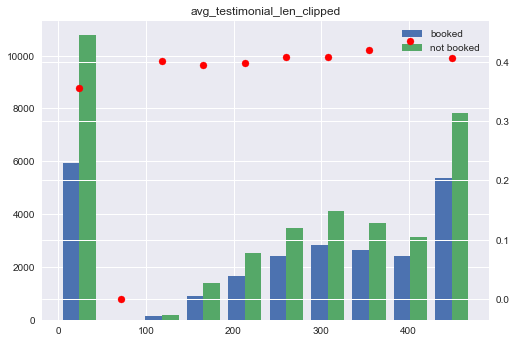

'prevalence is 0.727314211213'

'=================================================================='

max_clip is 7.60936


'Feature :: avg_image_resolution_clipped'

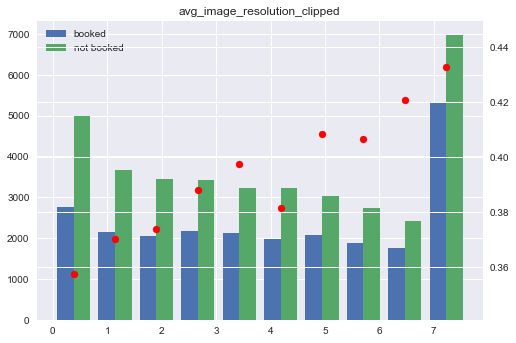

'prevalence is 0.991492829205'

'=================================================================='

gender


,count,mean
gender,,
f,53441,0.395969
m,4411,0.402630


'=================================================================='

max_clip is 20.0


'Feature :: years_of_experience_clipped'

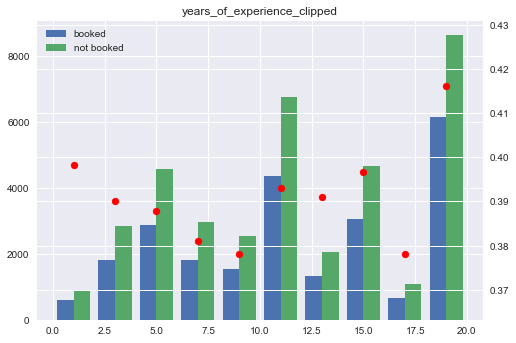

'prevalence is 0.994325038322'

'=================================================================='

max_clip is 0.0


'Feature :: donation_clipped'

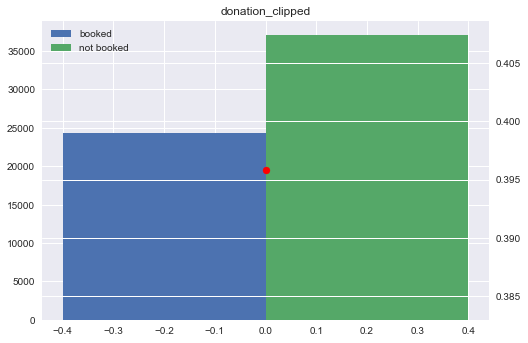

'prevalence is 0.0'

'=================================================================='

'Feature :: app_downloaded'

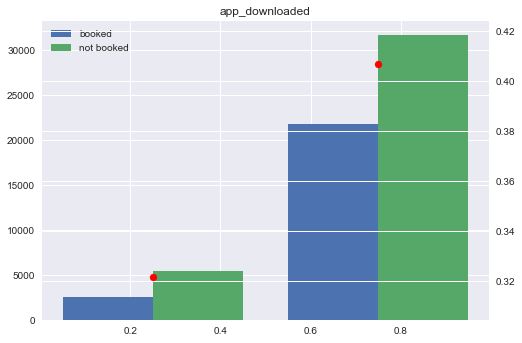

'prevalence is 0.869703389831'

'=================================================================='

verified_by


,count,mean
verified_by,,
None,1482,0.392038
None admin,1,0.000000
None sms,78,0.307692
None voice,6,0.333333
admin,258,0.360465
admin None,6,0.500000
admin sms,9,0.222222
admin voice None,1,1.000000
sms,56733,0.396965


'=================================================================='

'Feature :: used_rover_to_find_sitter'

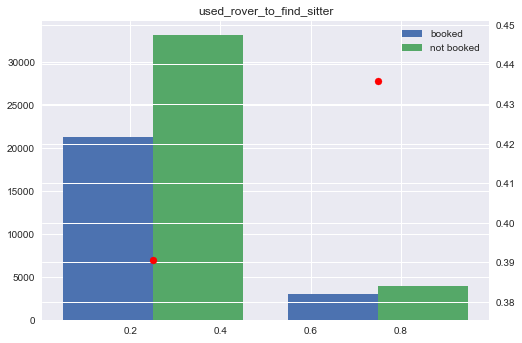

'prevalence is 0.113738591917'

'=================================================================='

building_type


/Users/wendyshi/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in divide


,count,mean
building_type,,


'=================================================================='

yard_type


,count,mean
yard_type,,


'=================================================================='

'Feature :: inspected_home'

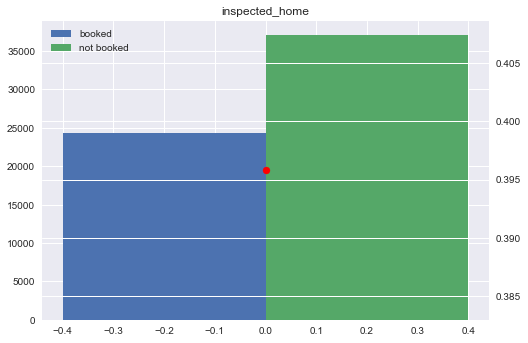

'prevalence is 0.0'

'=================================================================='

max_clip is 16507.0


'Feature :: avg_service_response_seconds_clipped'

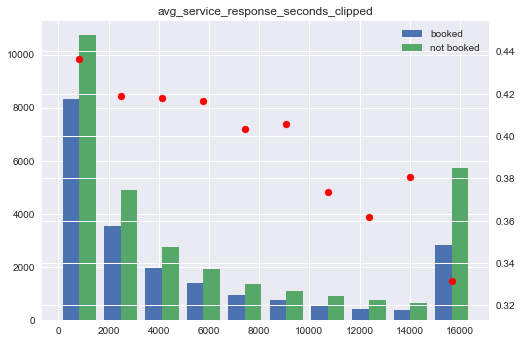

'prevalence is 1.0'

'=================================================================='

max_clip is 23317.0


'Feature :: avg_sitter_response_seconds_clipped'

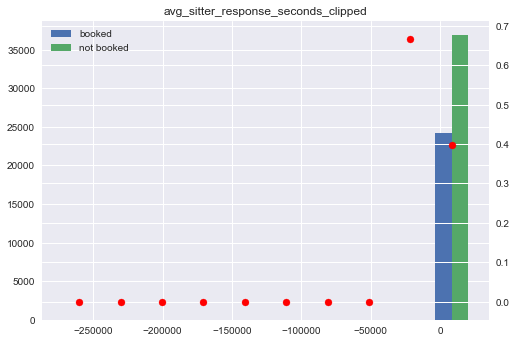

'prevalence is 0.999967288726'

'=================================================================='

max_clip is 1.0


'Feature :: rover_imported_ratio_clipped'

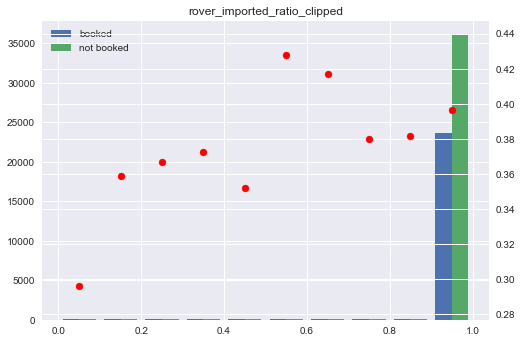

'prevalence is 0.998907834252'

'=================================================================='

max_clip is 82.0


'Feature :: calendar_recency_clipped'

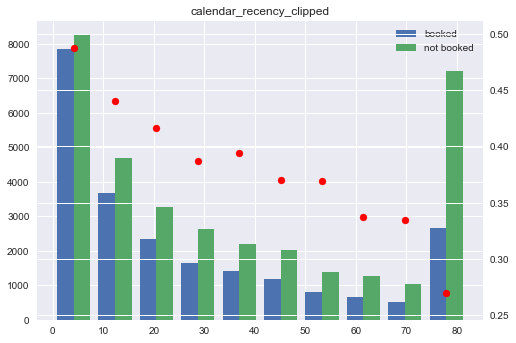

'prevalence is 0.95164808105'

'=================================================================='

,feature_name,prevalance
0,sitter_response_pct,0.996431
1,service_response_pct,0.994387
2,signup_reason,1.000000
3,expected_earnings,1.000000
4,available_all_days,0.909615
5,rover_training,0.368057
6,lessonly_training,0.003618
7,background_check_taken,1.000000
8,has_insurance,0.016102
9,num_testimonials,0.727314


,feature_name,max_clip,min_clip
0,sitter_response_pct,1.00000,0.910000
1,service_response_pct,1.00000,0.930000
2,signup_reason,-1.00000,-1.000000
3,expected_earnings,-1.00000,-1.000000
4,available_all_days,-1.00000,-1.000000
5,rover_training,-1.00000,-1.000000
6,lessonly_training,-1.00000,-1.000000
7,background_check_taken,-1.00000,-1.000000
8,has_insurance,-1.00000,-1.000000
9,num_testimonials,4.00000,0.000000


In [6]:
from IPython.display import display
#from analytics_lib.Bucket_BR_Plot import c_bucketplot
start = False
exclude = list()
prevalance = pd.DataFrame(columns=['feature_name','prevalance'])
clip = pd.DataFrame(columns=['feature_name','max_clip','min_clip'])

ob_numerical = ob.select_dtypes(include=['float64'])
display_switch = True
index = 0
for i in ob_raw_fea:
    #first feature    
    if ('_request' not in i and '_booking' not in i and 'cbr' not in i):
        
        fea_ = i
        max_clip = -1
        min_clip = -1
        if fea_ in list(ob_numerical):
            if(len(ob[pd.isnull(ob[i])==False][i].unique()) > 2):
                max_clip = ob[fea_].quantile(0.85,interpolation='nearest')
                min_clip = ob[fea_].quantile(0.1,interpolation='nearest')
                ob[i+'_clipped'] = ob[i].clip(upper = max_clip)
                fea_ = ob[i+'_clipped']
                fea_ = i + '_clipped'
                print 'max_clip is ' + str(max_clip)
            if(ob[pd.isnull(ob[fea_])][fea_].count() > 0):
                perc = (ob[fea_].count()-ob[pd.isnull(ob[fea_])][fea_].count())/(ob[fea_].count()+0.0)
            else:
                perc = (ob[fea_].count()-ob[ob[fea_]==0][fea_].count()-ob[pd.isnull(ob[fea_])][fea_].count())/(ob[fea_].count()+0.0)
            display('Feature :: ' + str(fea_))
            if(display_switch):
                Bucket_BR_Plot(ob[pd.isnull(ob[fea_])==False],fea_col=str(fea_),booked_col='booked',no_bin=min(10,len(ob[fea_].unique())),fig_name=fea_)
            display('prevalence is '+str(perc))
        else:
            if(ob[pd.isnull(ob[fea_])][fea_].count() > 0):
                perc = (ob[fea_].count()-ob[ob[fea_]==''][fea_].count()-ob[pd.isnull(ob[fea_])][fea_].count())/(ob[fea_].count()+0.0)
            else:
                print fea_
                perc = (ob[fea_].count()-ob[ob[fea_]==''][fea_].count()-ob[pd.isnull(ob[fea_])][fea_].count())/(ob[fea_].count()+0.0)
            if(display_switch):   
                display(ob.groupby(fea_).booked.agg(['count','mean']))   
            #display('prevalence is '+str(perc))
        if (perc<5.0/100):
            exclude = exclude+[fea_]
        prevalance.loc[index] = [i,perc]
        clip.loc[index] = [i,max_clip,min_clip]
        index = index + 1
        display('==================================================================')
display(prevalance)
display(clip)
    

In [7]:
def basic_stats_on_feature(ob, feature_cols,display_switch=True):
    from IPython.display import display
    #from analytics_lib.Bucket_BR_Plot import c_bucketplot
    exclude = list()
    prevalance = pd.DataFrame(columns=['feature_name','prevalance'])
    ob_numerical = ob.select_dtypes(include=['float64','int64','bool_'])
    display_switch = display_switch
    index = 0
    for i in feature_cols:
        fea_ = i
        print fea_
        if fea_ in list(ob_numerical):
            if(len(ob[pd.isnull(ob[i])==False][i].unique()) > 3):
                max_clip = ob[fea_].quantile(0.85,interpolation='nearest')
                ob[i+'_clipped'] = ob[i].clip(upper = max_clip)
                fea_ = ob[i+'_clipped']
                fea_ = i + '_clipped'
            if(ob[pd.isnull(ob[fea_])][fea_].count() > 0):
                perc = (ob[fea_].count()-ob[pd.isnull(ob[fea_])][fea_].count())/(ob[fea_].count()+0.0)
            else:
                perc = (ob[fea_].count()-ob[ob[fea_]==0][fea_].count()-ob[pd.isnull(ob[fea_])][fea_].count())/(ob[fea_].count()+0.0)
            display('Feature :: ' + str(fea_))
            if(display_switch):
                Bucket_BR_Plot(ob[pd.isnull(ob[fea_])==False],fea_col=str(fea_),booked_col='booked',no_bin=min(10,len(ob[fea_].unique())),fig_name=fea_)
            display('prevalence is '+str(perc))
        else:
            print i +' is not numerical'
            if(ob[pd.isnull(ob[fea_])][fea_].count() > 0):
                perc = (ob[fea_].count()-ob[pd.isnull(ob[fea_])][fea_].count())/(ob[fea_].count()+0.0)
            else:
                #doesn't have null
                perc = (ob[fea_].count()-ob[ob[fea_]==''][fea_].count()-ob[pd.isnull(ob[fea_])][fea_].count())/(ob[fea_].count()+0.0)
            if(display_switch):   
                display(ob.groupby(fea_).booked.agg(['count','mean']))   
            #display('prevalence is '+str(perc))
        if (perc<5.0/100):
            exclude = exclude+[fea_]
        prevalance.loc[index] = [i,perc]
        index = index + 1
        display('==================================================================')
    display(prevalance.sort_values(by=prevalance,ascending=False))
    return prevalance

In [8]:
prevalance.sort_values(by='prevalance',ascending=False)

,feature_name,prevalance
26,verified_by,1.000000
22,gender,1.000000
2,signup_reason,1.000000
3,expected_earnings,1.000000
31,avg_service_response_seconds,1.000000
7,background_check_taken,1.000000
19,num_images,1.000000
32,avg_sitter_response_seconds,0.999967
18,description_len,0.999332
33,rover_imported_ratio,0.998908


In [14]:
feature_to_eval = ['signup_reason',
 u'available_all_days',
 u'rover_training',
 u'background_check_taken',
 u'has_insurance',
 u'is_premier',
 u'facebook_connected',
 u'app_downloaded',
 u'used_rover_to_find_sitter',
 u'building_type',
 u'yard_type',
 u'inspected_home', 
 'calendar_recency','provider_cbr_all',
 'num_testimonials',
 u'description_len',
 u'num_images',
 u'avg_testimonial_len',
 u'avg_image_resolution',
 u'years_of_experience','avg_service_response_seconds',
 'sitter_response_pct',
 'avg_sitter_response_seconds',
 'service_response_pct','lessonly_training',
 'first_booking', 'second_booking', 'third_booking', 'first_request', 'second_request', 'third_request',  'rover_imported_ratio', 'rover_imported_ratio_x_cbr','no_previous_request']

In [15]:
upper_clip_fea = [
 'calendar_recency',
 'num_testimonials',
 'description_len',
 'num_images',
 'avg_testimonial_len',
 'avg_image_resolution',
 'years_of_experience','avg_service_response_seconds','avg_sitter_response_seconds']
lower_clip_fea = ['sitter_response_pct',
 'service_response_pct']


In [16]:
clip_setting_file_name = os.path.join(data_dir,'features_clipped_settings_'+slug+'.csv')
if (reset_switch == True):

    clip_setting = pd.DataFrame(columns=['feature_name','min_clip','max_clip'])
    clip_setting['feature_name'] = upper_clip_fea + lower_clip_fea
    for fea in upper_clip_fea:
        print fea
        temp =  clip.loc[clip.feature_name == fea,'max_clip'].values[0]
        clip_setting.loc[clip_setting.feature_name == fea,'max_clip'] = temp
    for fea in lower_clip_fea:
        temp =  clip.loc[clip.feature_name == fea,'min_clip'].values[0]
        clip_setting.loc[clip_setting.feature_name == fea,'min_clip'] = temp
    display(clip_setting)
    clip_setting.to_csv(clip_setting_file_name)
else :
    clip_setting = pd.read_csv(clip_setting_file_name)

calendar_recency
num_testimonials
description_len
num_images
avg_testimonial_len
avg_image_resolution
years_of_experience
avg_service_response_seconds
avg_sitter_response_seconds


,feature_name,min_clip,max_clip
0,calendar_recency,NaN,82
1,num_testimonials,NaN,4
2,description_len,NaN,1219
3,num_images,NaN,22
4,avg_testimonial_len,NaN,473
5,avg_image_resolution,NaN,7.60936
6,years_of_experience,NaN,20
7,avg_service_response_seconds,NaN,16507
8,avg_sitter_response_seconds,NaN,23317
9,sitter_response_pct,0.91,NaN


In [17]:
categorical_fea = ['signup_reason',
 u'building_type',
 u'yard_type','no_previous_request']

In [18]:
dummy_col = ['conversation_id','booked','status']

## Use radom forest to rank feature importance

# fill in nan value with median value

In [19]:
fill_setting_file_name = os.path.join(data_dir,'features_fill_nan_settings_'+slug+'.csv')


ob_dummy = pd.get_dummies(ob[feature_to_eval+['status']+['booked']+['conversation_id']],columns=categorical_fea)
ob_dummy_filled_bygroup = ob_dummy

if (reset_switch == True):
    fill_setting = pd.DataFrame(columns=['feature_name','matriculation_level','fill_value'])
    for status in ob_dummy.status.unique():
        fill_setting_sub = pd.DataFrame(columns=['feature_name','matriculation_level','fill_value'])
        fill_setting_sub['feature_name']  = feature_to_eval
        fill_setting_sub['matriculation_level'] = status
        sub = ob_dummy[ob_dummy.status == status]
        for i in list(ob_dummy):
            if (sub.loc[pd.isnull(sub[i]),i].size > 0):
    #             print sub[i].agg(['median','min','max'])
#                 print status + '::' + i
    #             print sub.loc[pd.isnull(sub[i]),i].size
                temp = sub.loc[pd.isnull(sub[i]) == False,i].median()
#                 print temp
                fill_setting_sub.loc[(fill_setting_sub.feature_name == i) & (fill_setting_sub.matriculation_level == status),'fill_value'] = temp
#                 print '======='
                ob_dummy_filled_bygroup.loc[(ob_dummy_filled_bygroup.status == status)&(pd.isnull(ob_dummy_filled_bygroup[i])),i] = temp
        fill_setting = fill_setting.append(fill_setting_sub)  
    fill_setting.to_csv(fill_setting_file_name)
else:
    fill_setting = pd.read_csv(fill_setting_file_name)
display(fill_setting[pd.isnull(fill_setting.fill_value) == False].sort_values(by='feature_name'))                                                                   

,feature_name,matriculation_level,fill_value
20,avg_service_response_seconds,green,1939
20,avg_service_response_seconds,seeding,1166
20,avg_service_response_seconds,red,3769
22,avg_sitter_response_seconds,seeding,1793
22,avg_sitter_response_seconds,green,4597
12,calendar_recency,green,24
12,calendar_recency,red,21
12,calendar_recency,seeding,21
13,provider_cbr_all,seeding,0
31,rover_imported_ratio,green,1


In [20]:
ob.groupby('provider_type').rover_imported_ratio.agg(['count','mean','median','min','max'])

,count,mean,median,min,max
provider_type,,,,,
merged,4948,0.895504,1.0,0.0,1.0
migrated,2112,0.765975,1.0,0.0,1.0
rover,48761,1.000000,1.0,1.0,1.0
rover-havent-merged,5525,1.000000,1.0,1.0,1.0


## clip with 85% quantile and 10% in the group

In [21]:
ob_dummy_filled_bygroup_clipped = ob_dummy_filled_bygroup.copy()
for fea_ in upper_clip_fea:
    if (fea_ not in categorical_fea and 'clip' not in fea_):
        print fea_
        max_clip = clip_setting.loc[clip_setting.feature_name == fea_,'max_clip'].values[0]
        ob_dummy_filled_bygroup_clipped[fea_+'_clipped'] = ob_dummy_filled_bygroup[fea_].clip(upper = max_clip )
        ob_dummy_filled_bygroup_clipped.drop(fea_,axis=1,inplace=True)   
for fea_ in lower_clip_fea:
    if (fea_ not in categorical_fea and 'clip' not in fea_):
        print fea_
        min_clip = clip_setting.loc[clip_setting.feature_name == fea_,'min_clip'].values[0]
        ob_dummy_filled_bygroup_clipped[fea_+'_clipped'] = ob_dummy_filled_bygroup[fea_].clip(lower = min_clip )
        ob_dummy_filled_bygroup_clipped.drop(fea_,axis=1,inplace=True)  

calendar_recency
num_testimonials
description_len
num_images
avg_testimonial_len
avg_image_resolution
years_of_experience
avg_service_response_seconds
avg_sitter_response_seconds
sitter_response_pct
service_response_pct


In [22]:
no_eval_col = ['first_booking', 'second_booking', 'third_booking', 'first_request', 'second_request', 'third_request']

analytics_lib/FeaImportancebyRF.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_fit = rf.fit(X, y)


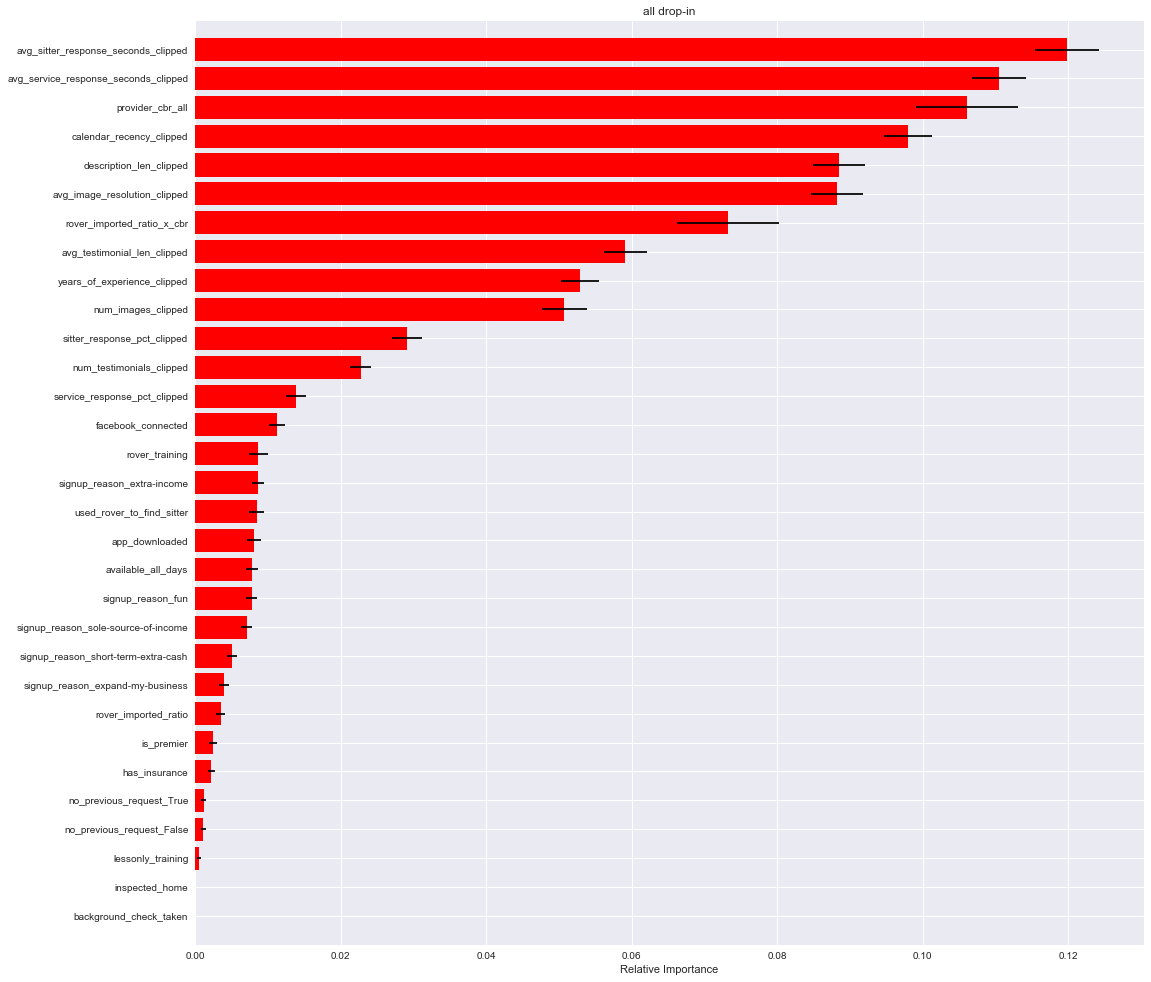

,importance,name,prevalance
0,0.1198,avg_sitter_response_seconds_clipped,0.9999
1,0.1104,avg_service_response_seconds_clipped,1.0000
2,0.1060,provider_cbr_all,0.8666
3,0.0980,calendar_recency_clipped,0.9552
4,0.0884,description_len_clipped,0.9993
5,0.0881,avg_image_resolution_clipped,0.9915
6,0.0732,rover_imported_ratio_x_cbr,0.8661
7,0.0591,avg_testimonial_len_clipped,0.7273
8,0.0529,years_of_experience_clipped,0.9943
9,0.0507,num_images_clipped,1.0000


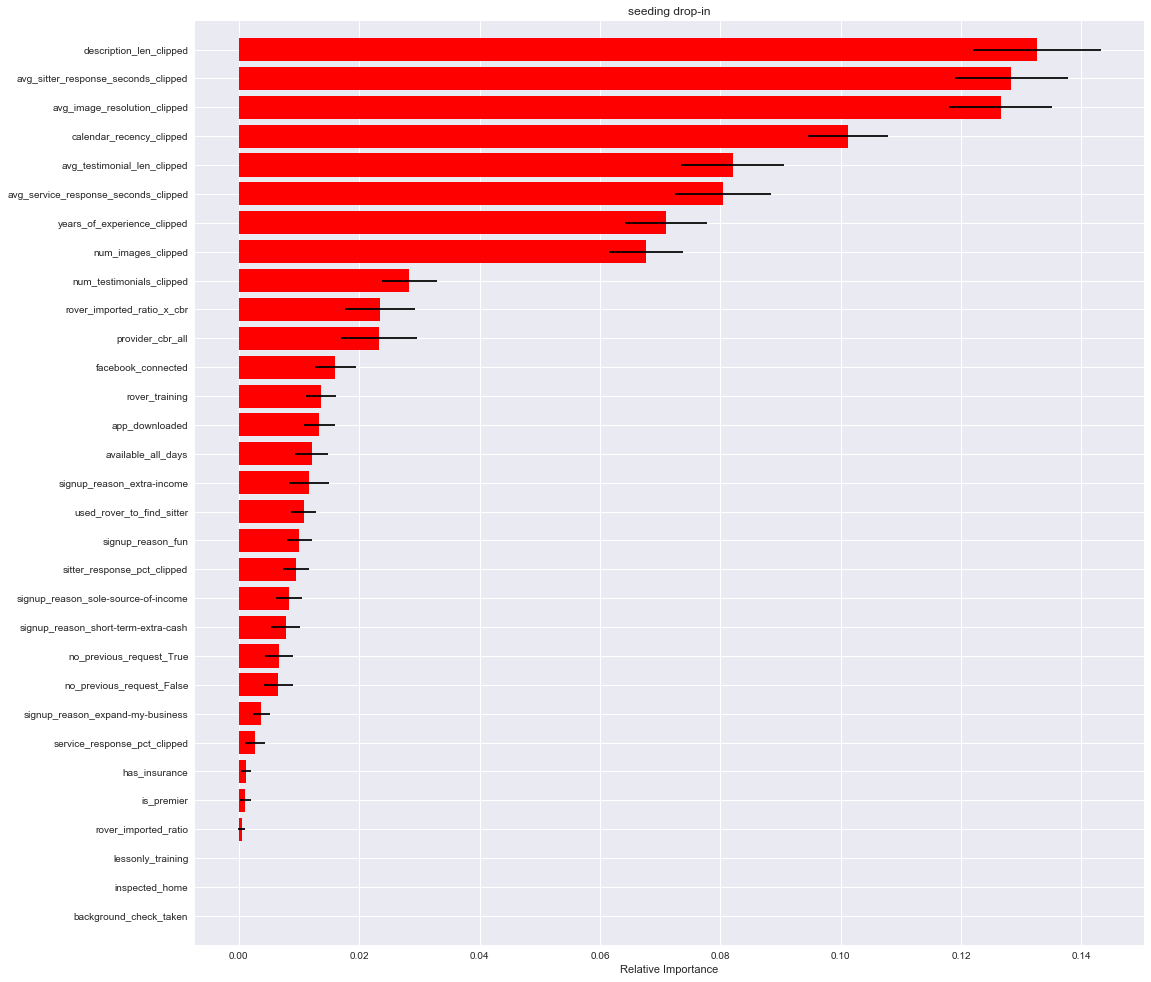

,importance,name,prevalance
0,0.1326,description_len_clipped,0.9997
1,0.1283,avg_sitter_response_seconds_clipped,0.9998
2,0.1266,avg_image_resolution_clipped,0.9963
3,0.1012,calendar_recency_clipped,0.9571
4,0.0820,avg_testimonial_len_clipped,0.6677
5,0.0804,avg_service_response_seconds_clipped,1.0000
6,0.0709,years_of_experience_clipped,0.9912
7,0.0677,num_images_clipped,1.0000
8,0.0283,num_testimonials_clipped,0.6677
9,0.0234,rover_imported_ratio_x_cbr,0.3726


None


'seeding drop-in'

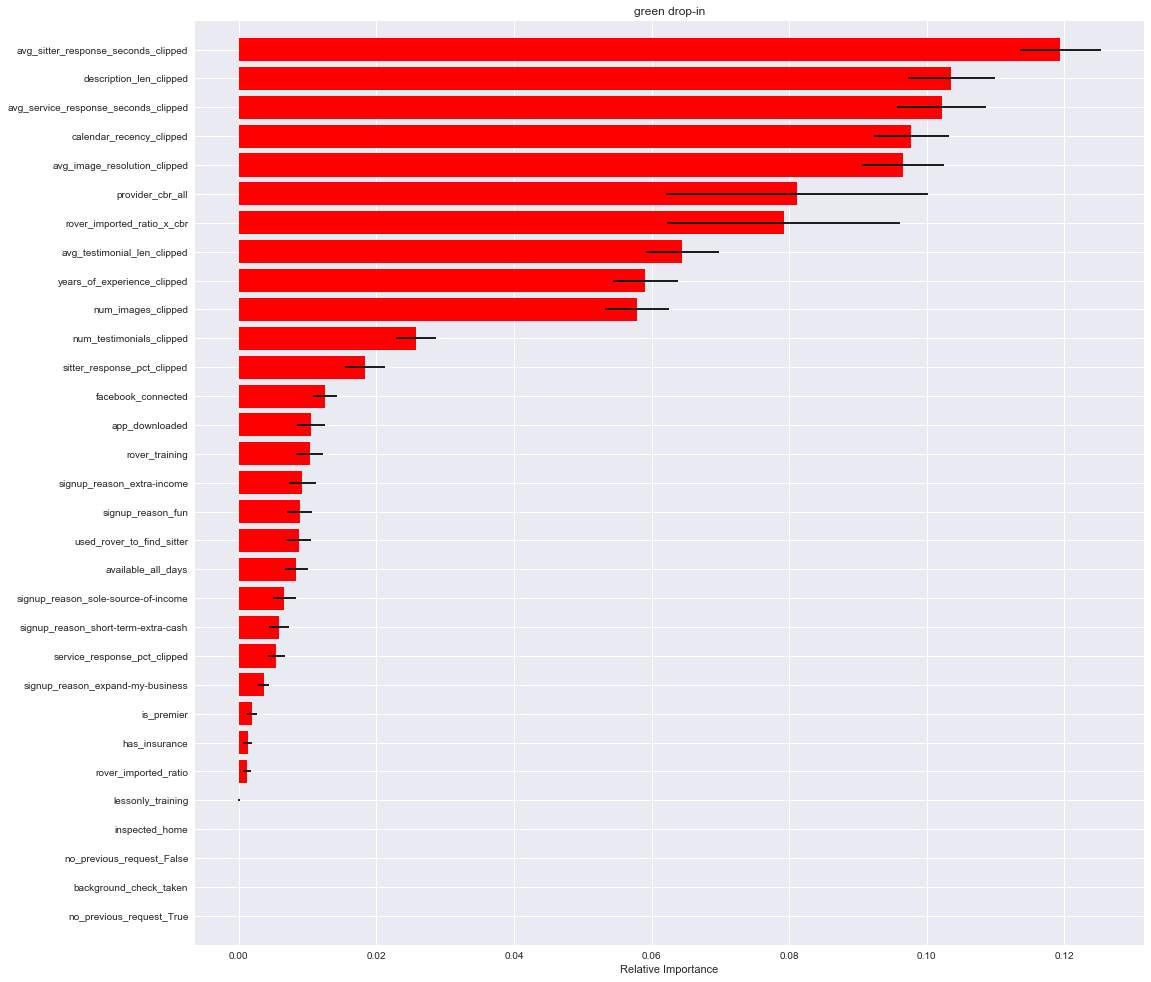

,importance,name,prevalance
0,0.1194,avg_sitter_response_seconds_clipped,0.9999
1,0.1036,description_len_clipped,0.9997
2,0.1022,avg_service_response_seconds_clipped,1.0000
3,0.0978,calendar_recency_clipped,0.9603
4,0.0965,avg_image_resolution_clipped,0.9926
5,0.0812,provider_cbr_all,0.8698
6,0.0792,rover_imported_ratio_x_cbr,0.8691
7,0.0645,avg_testimonial_len_clipped,0.7146
8,0.0591,years_of_experience_clipped,0.9930
9,0.0579,num_images_clipped,1.0000


None


'green drop-in'

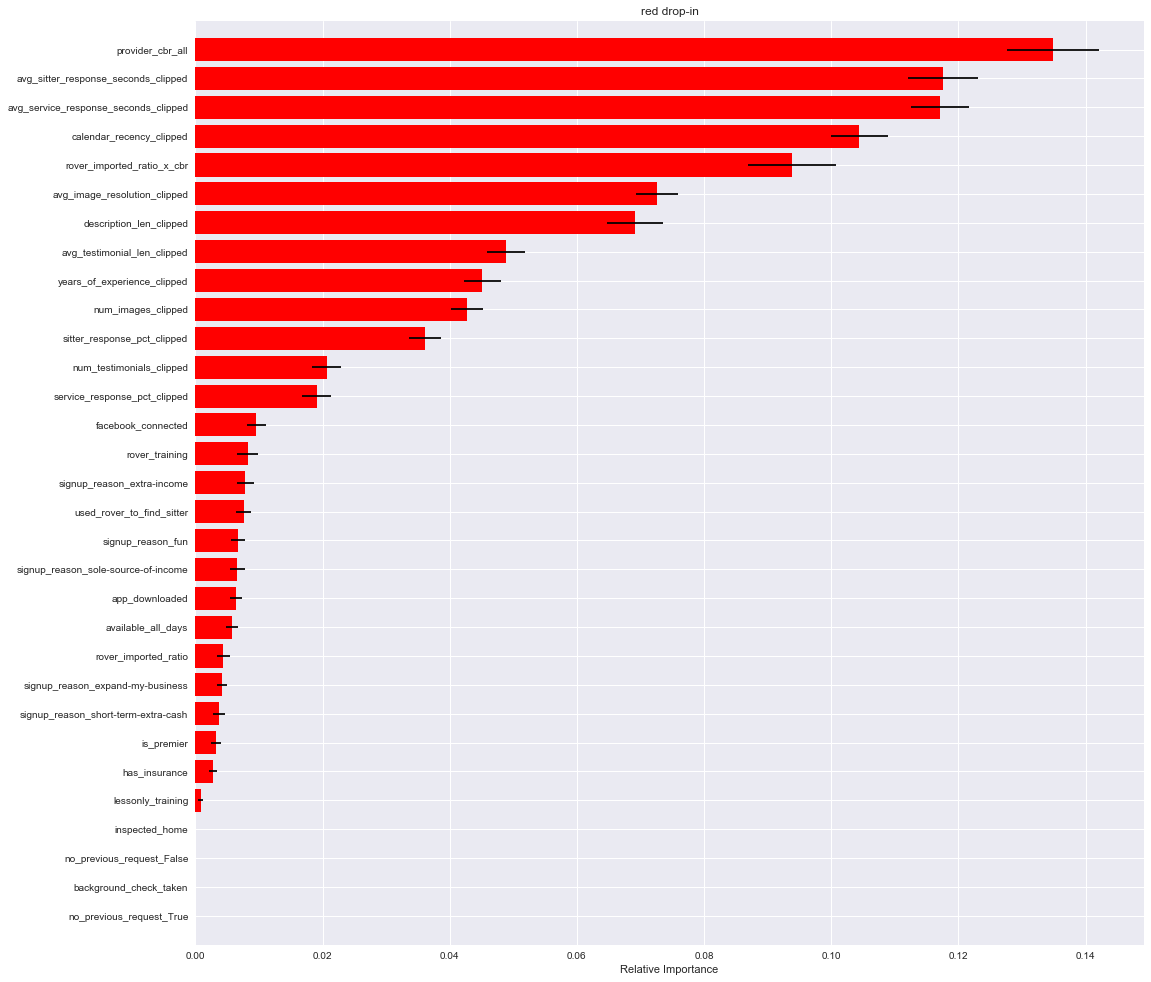

,importance,name,prevalance
0,0.1348,provider_cbr_all,0.9954
1,0.1176,avg_sitter_response_seconds_clipped,0.9999
2,0.1171,avg_service_response_seconds_clipped,1.0000
3,0.1044,calendar_recency_clipped,0.9518
4,0.0939,rover_imported_ratio_x_cbr,0.9951
5,0.0726,avg_image_resolution_clipped,0.9896
6,0.0691,description_len_clipped,0.9990
7,0.0488,avg_testimonial_len_clipped,0.7504
8,0.0451,years_of_experience_clipped,0.9959
9,0.0427,num_images_clipped,1.0000


None


'red drop-in'

,importance,name,prevalance,status
0,0.1198,avg_sitter_response_seconds_clipped,0.9999,all
1,0.1104,avg_service_response_seconds_clipped,1.0000,all
2,0.1060,provider_cbr_all,0.8666,all
3,0.0980,calendar_recency_clipped,0.9552,all
4,0.0884,description_len_clipped,0.9993,all
5,0.0881,avg_image_resolution_clipped,0.9915,all
6,0.0732,rover_imported_ratio_x_cbr,0.8661,all
7,0.0591,avg_testimonial_len_clipped,0.7273,all
8,0.0529,years_of_experience_clipped,0.9943,all
9,0.0507,num_images_clipped,1.0000,all


In [23]:
from analytics_lib.FeaImportancebyRF import FeaImportancebyRF
importance_df = FeaImportancebyRF(ob_dummy_filled_bygroup_clipped.drop(dummy_col+no_eval_col,axis=1),ob_dummy_filled_bygroup_clipped[['booked']],fig_name='all '+slug)
display(importance_df)
importance_df['status'] = 'all'
for status in ['seeding','green','red']:
    sub = ob_dummy_filled_bygroup_clipped[ob_dummy_filled_bygroup_clipped.status == status]
    a = FeaImportancebyRF(sub.drop(dummy_col+no_eval_col,axis=1),sub[['booked']],fig_name=status + ' ' + slug)
    display(a)
    a['status'] = status
    importance_df = importance_df.append(a)
    print(list(sub).remove('status'))
    fea_col = list(sub)
    fea_col.remove('status')
    display(status + ' '+slug)
display(importance_df)

In [24]:
feature_init = {'seeding':[],'green':[],'red':[]}
for status in ['seeding','green','red']:
    display('===========' + status + '===========')
    display
    #display(importance_df[importance_df.status==status])
    sub = importance_df[(importance_df.status==status)]
    #display(sub[sub.importance >= sub.importance.max()*0.3]['name'].tolist())
#     feature_init[status] = 
#     print sub.head()
    a = sub[sub.importance >= sub.importance.max()*0.4]['name'].tolist()
    b = ['first_booking',
 'second_booking',
 'first_request',
 'second_request']
    if (status != 'seeding'):
        b = b + ['third_booking','third_request']
    if 'relative_price_clipped' in a:
        a.remove('relative_price_clipped')
    if 'cbr*dv' in a:
        a = a + ['rover_dv_pct']
    feature_init[status]  = a+b
    print feature_init[status]

'===========seeding==========='

['description_len_clipped', 'avg_sitter_response_seconds_clipped', 'avg_image_resolution_clipped', 'calendar_recency_clipped', 'avg_testimonial_len_clipped', 'avg_service_response_seconds_clipped', 'years_of_experience_clipped', 'num_images_clipped', 'first_booking', 'second_booking', 'first_request', 'second_request']


'===========green==========='

['avg_sitter_response_seconds_clipped', 'description_len_clipped', 'avg_service_response_seconds_clipped', 'calendar_recency_clipped', 'avg_image_resolution_clipped', 'provider_cbr_all', 'rover_imported_ratio_x_cbr', 'avg_testimonial_len_clipped', 'years_of_experience_clipped', 'num_images_clipped', 'first_booking', 'second_booking', 'first_request', 'second_request', 'third_booking', 'third_request']


'===========red==========='

['provider_cbr_all', 'avg_sitter_response_seconds_clipped', 'avg_service_response_seconds_clipped', 'calendar_recency_clipped', 'rover_imported_ratio_x_cbr', 'avg_image_resolution_clipped', 'description_len_clipped', 'first_booking', 'second_booking', 'first_request', 'second_request', 'third_booking', 'third_request']


/Users/wendyshi/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


'===========seeding==========='

['description_len_clipped',
 'avg_sitter_response_seconds_clipped',
 'avg_image_resolution_clipped',
 'calendar_recency_clipped',
 'avg_testimonial_len_clipped',
 'avg_service_response_seconds_clipped',
 'years_of_experience_clipped',
 'num_images_clipped',
 'first_booking',
 'second_booking',
 'first_request',
 'second_request']

provider_cbr_all description_len_clipped


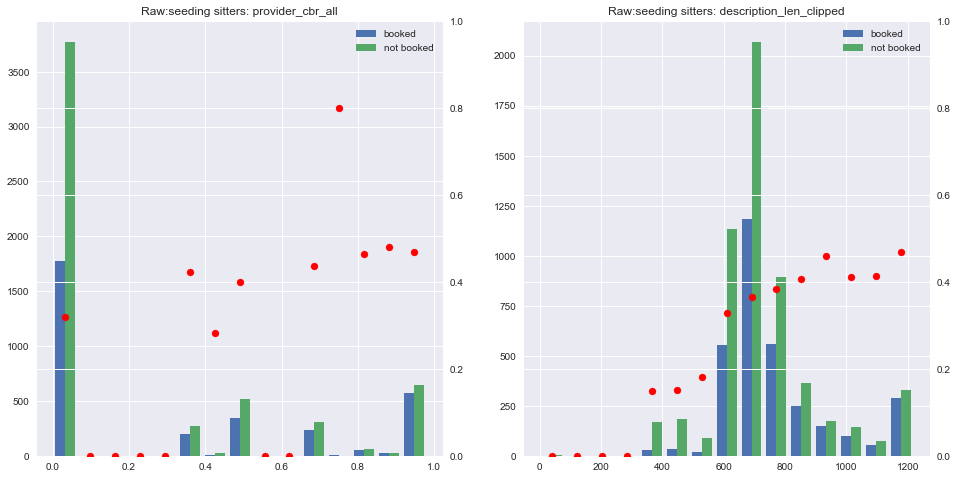

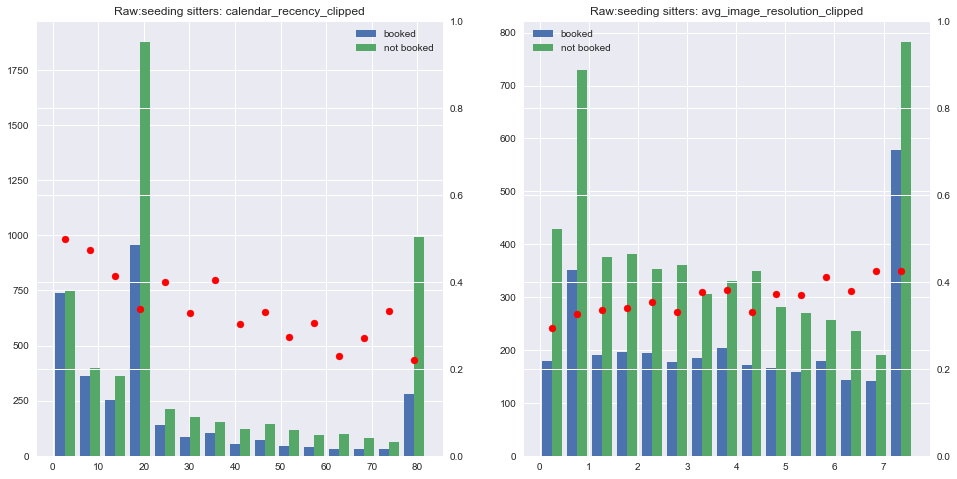

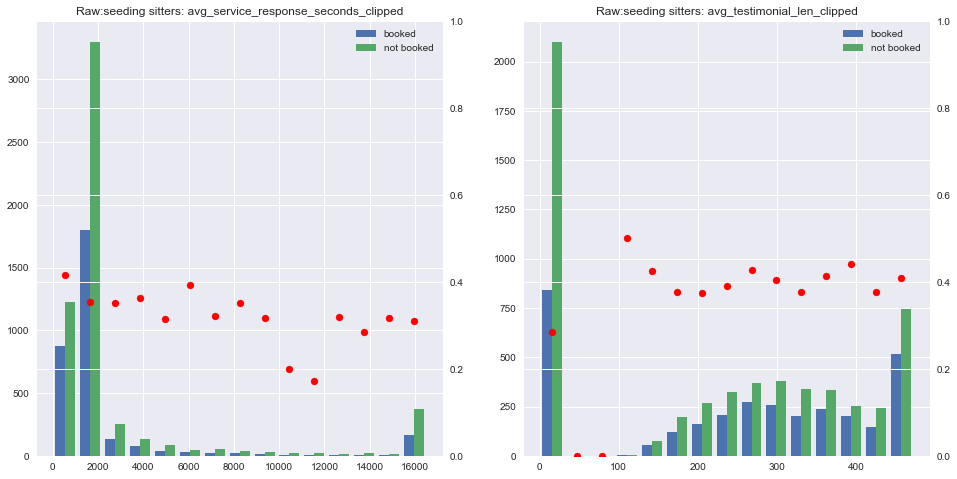

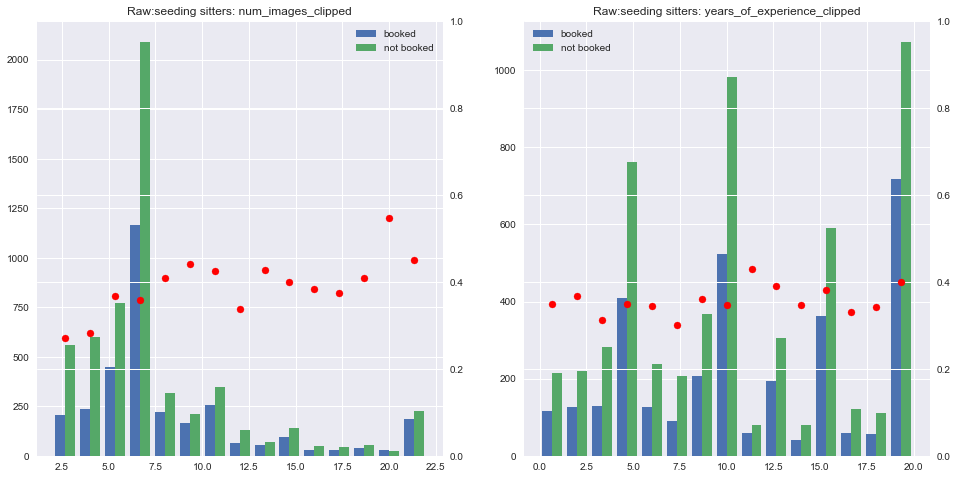

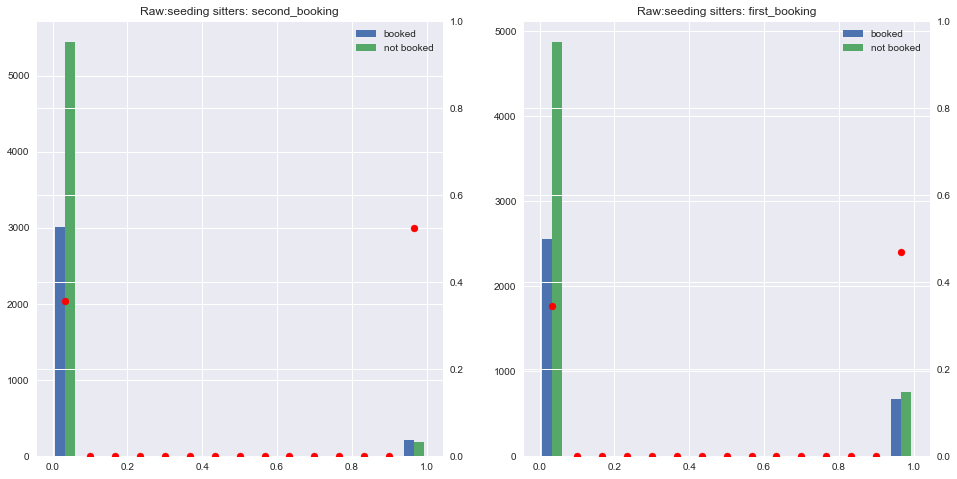

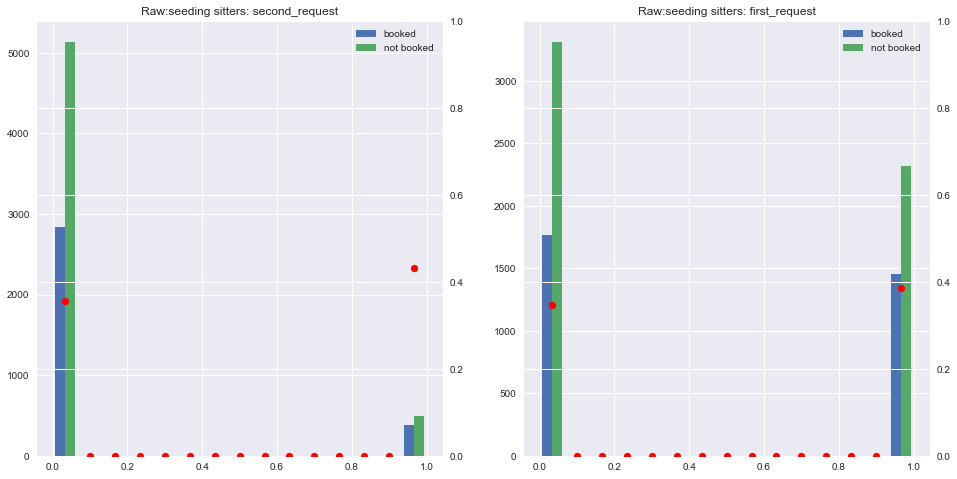

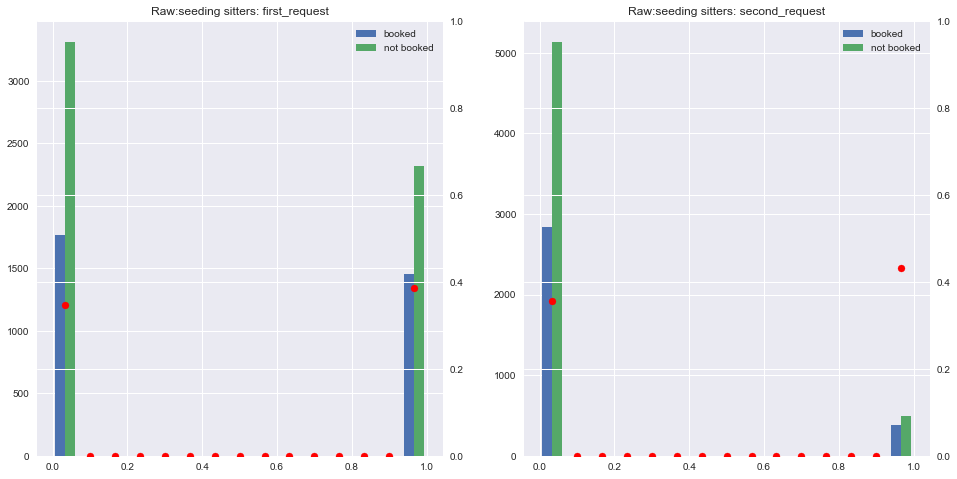

/Users/wendyshi/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


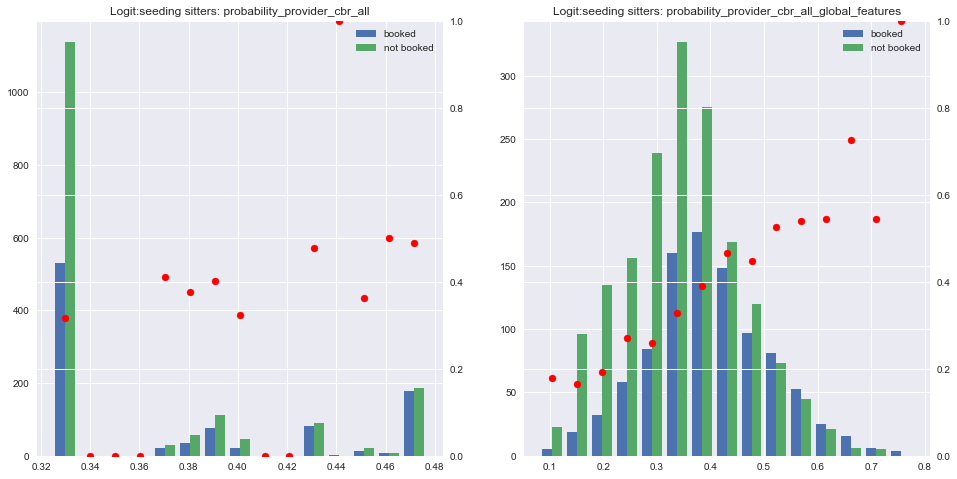

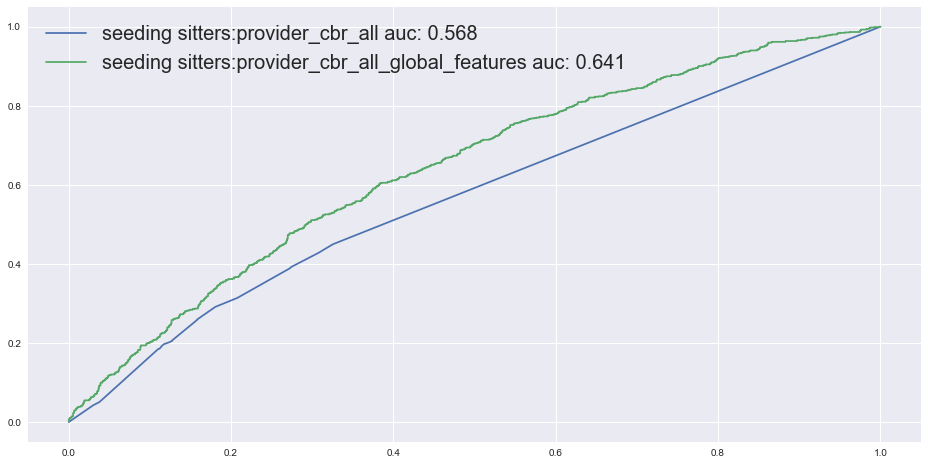

'===========green==========='

['avg_sitter_response_seconds_clipped',
 'description_len_clipped',
 'avg_service_response_seconds_clipped',
 'calendar_recency_clipped',
 'avg_image_resolution_clipped',
 'provider_cbr_all',
 'rover_imported_ratio_x_cbr',
 'avg_testimonial_len_clipped',
 'years_of_experience_clipped',
 'num_images_clipped',
 'first_booking',
 'second_booking',
 'first_request',
 'second_request',
 'third_booking',
 'third_request']

provider_cbr_all avg_sitter_response_seconds_clipped


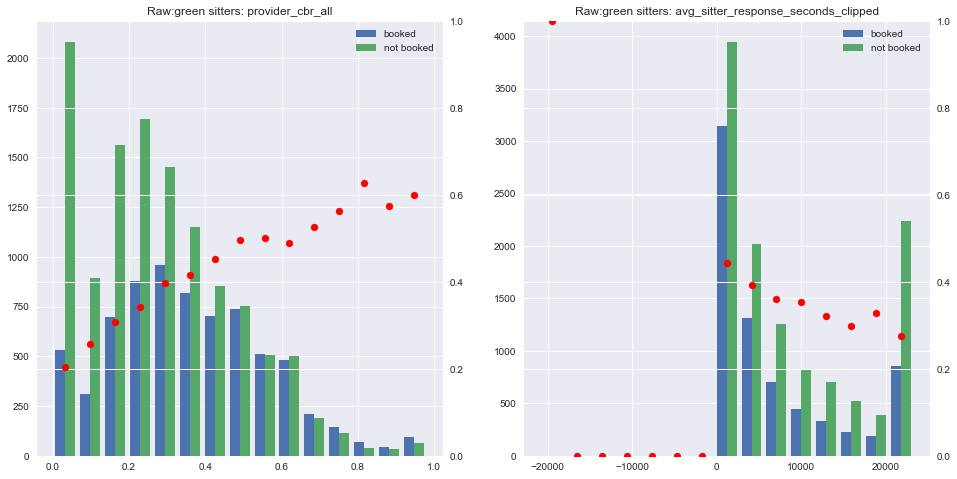

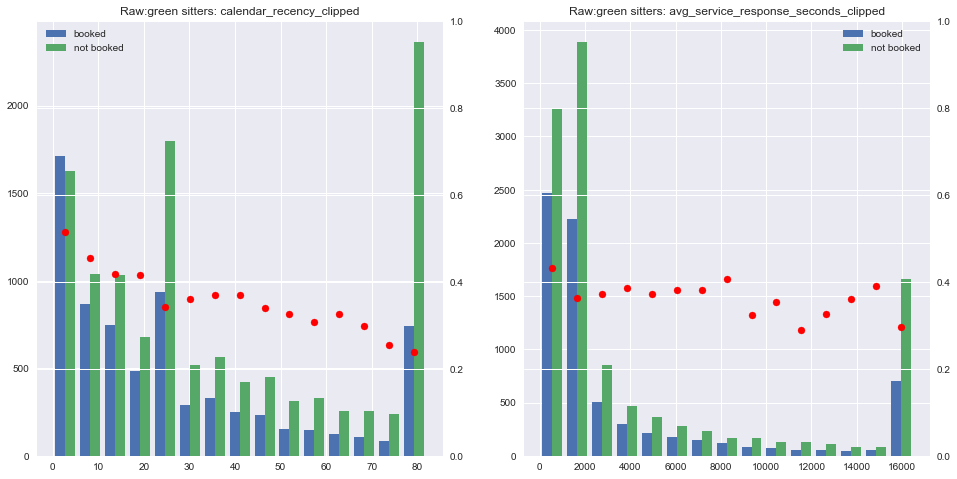

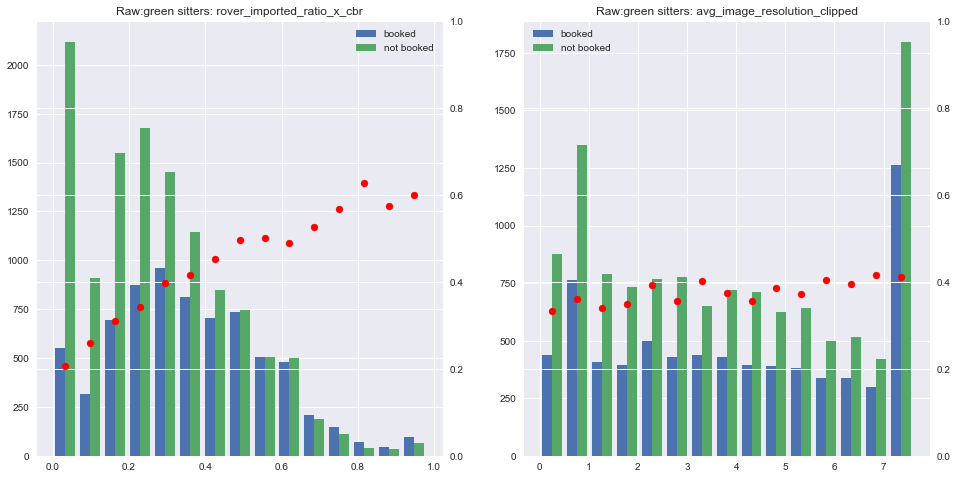

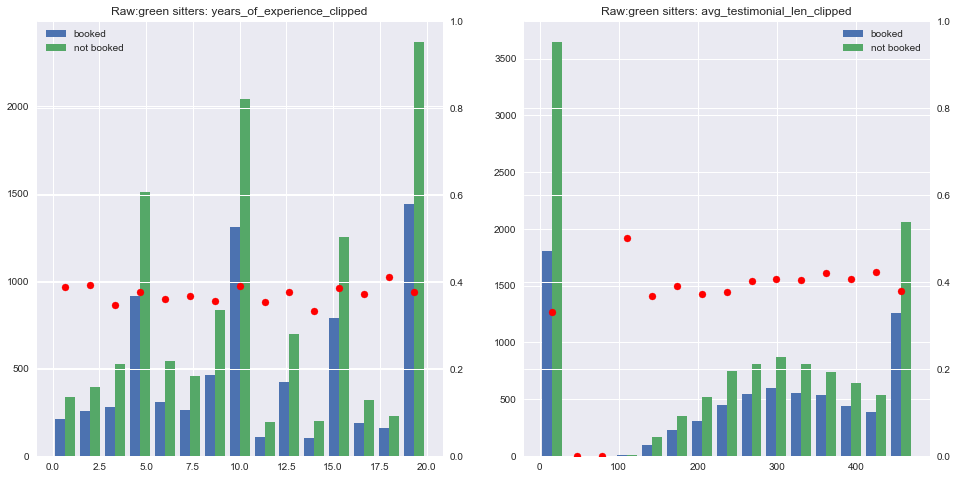

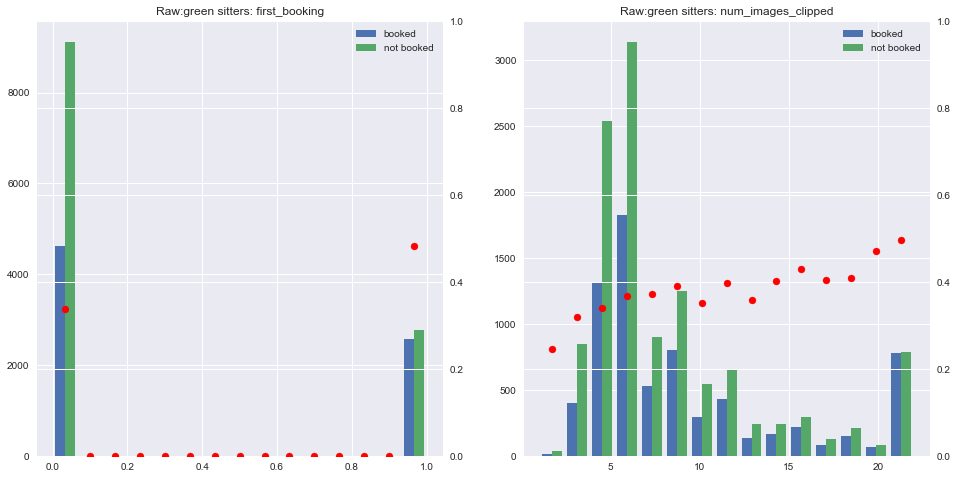

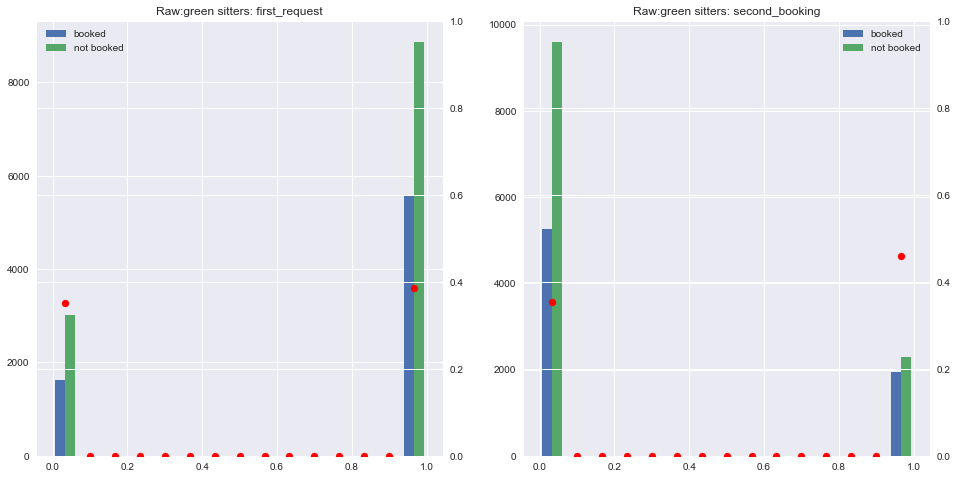

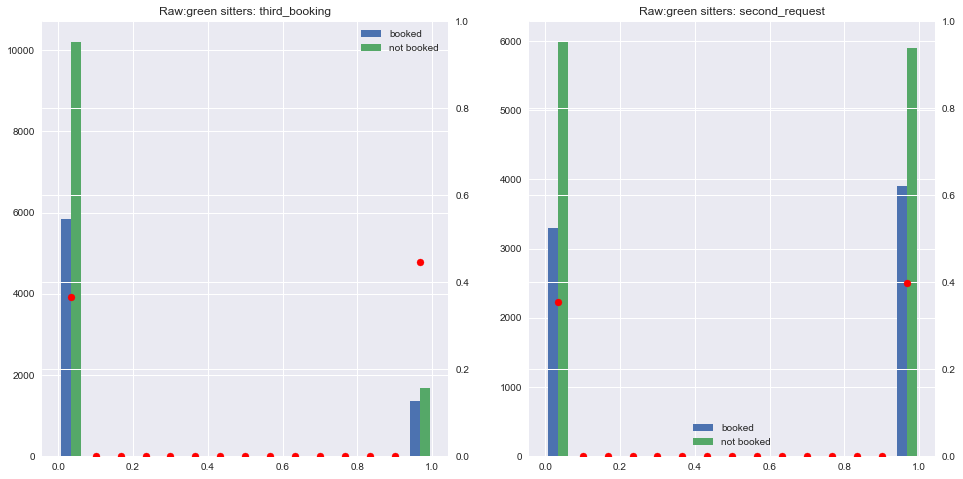

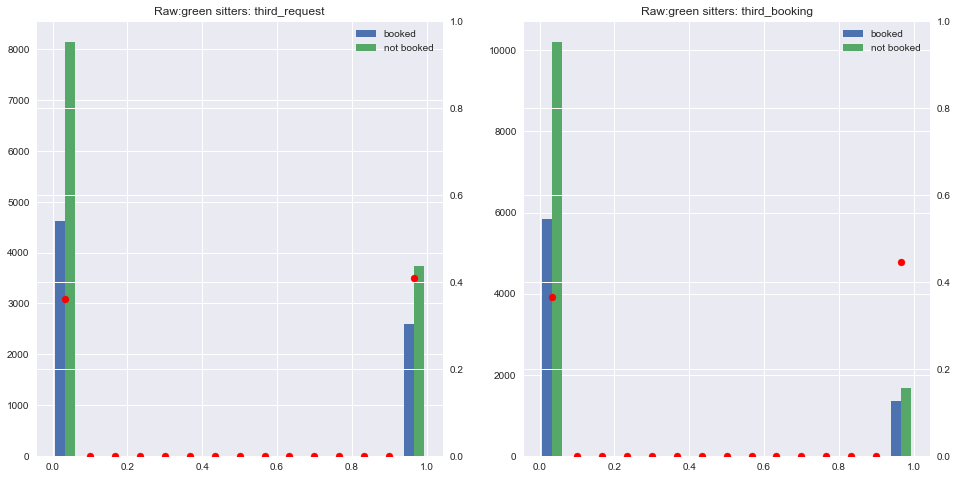

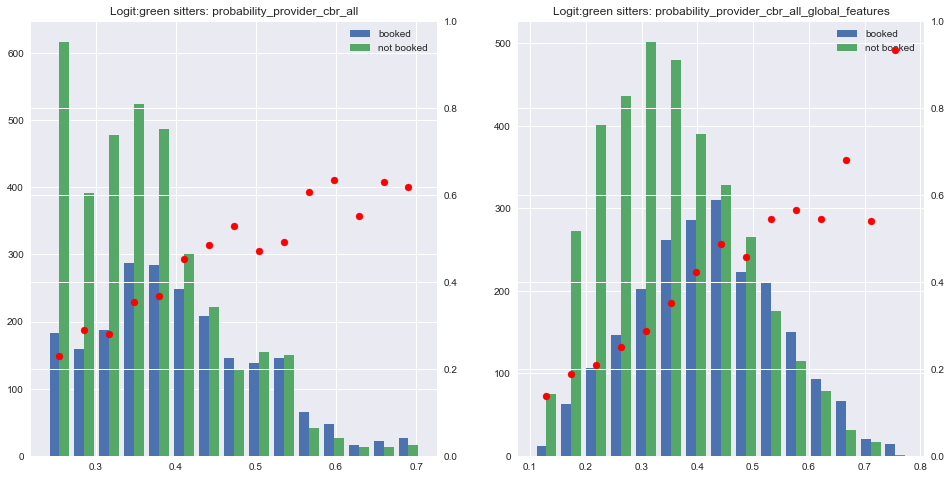

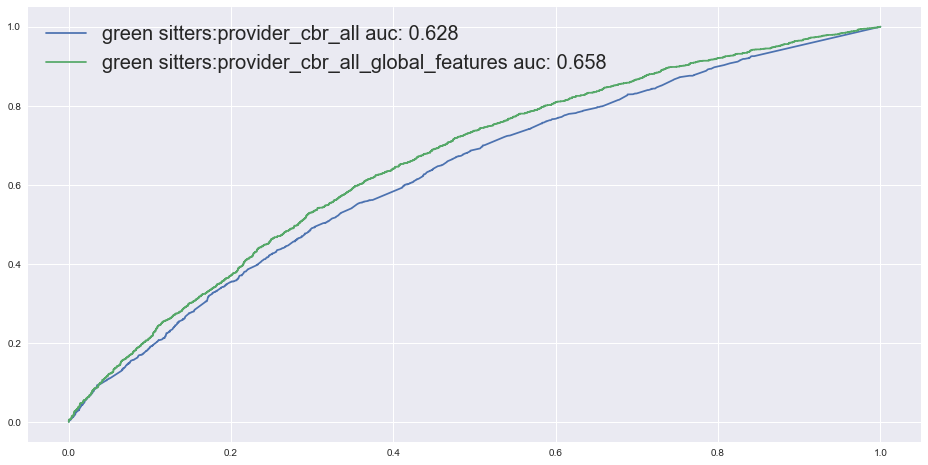

'===========red==========='

['provider_cbr_all',
 'avg_sitter_response_seconds_clipped',
 'avg_service_response_seconds_clipped',
 'calendar_recency_clipped',
 'rover_imported_ratio_x_cbr',
 'avg_image_resolution_clipped',
 'description_len_clipped',
 'first_booking',
 'second_booking',
 'first_request',
 'second_request',
 'third_booking',
 'third_request']

provider_cbr_all avg_sitter_response_seconds_clipped


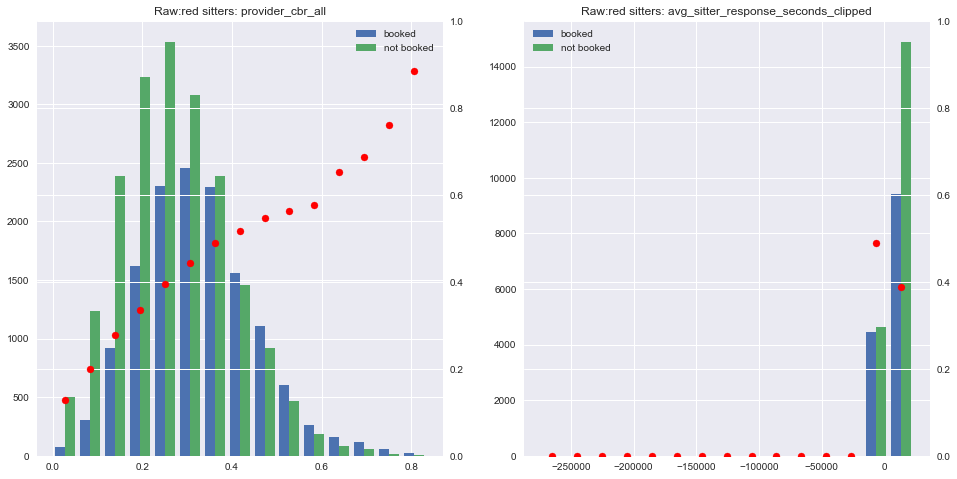

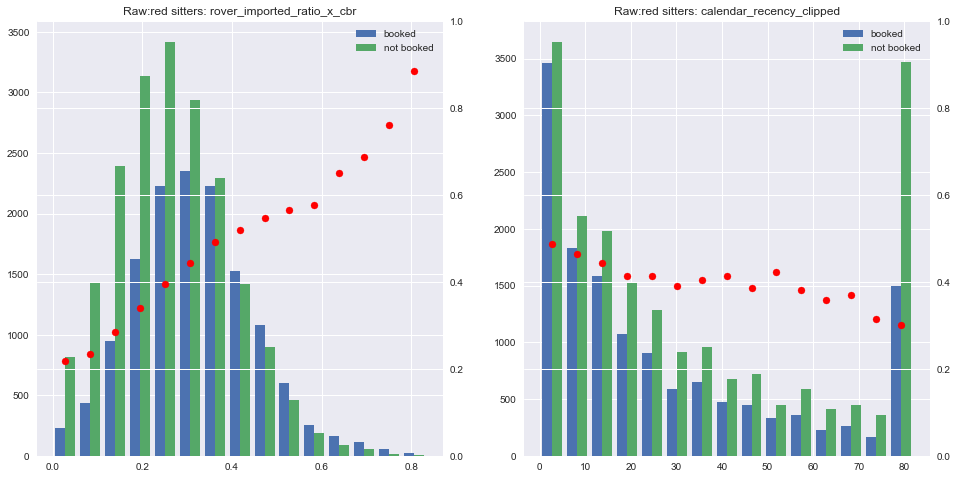

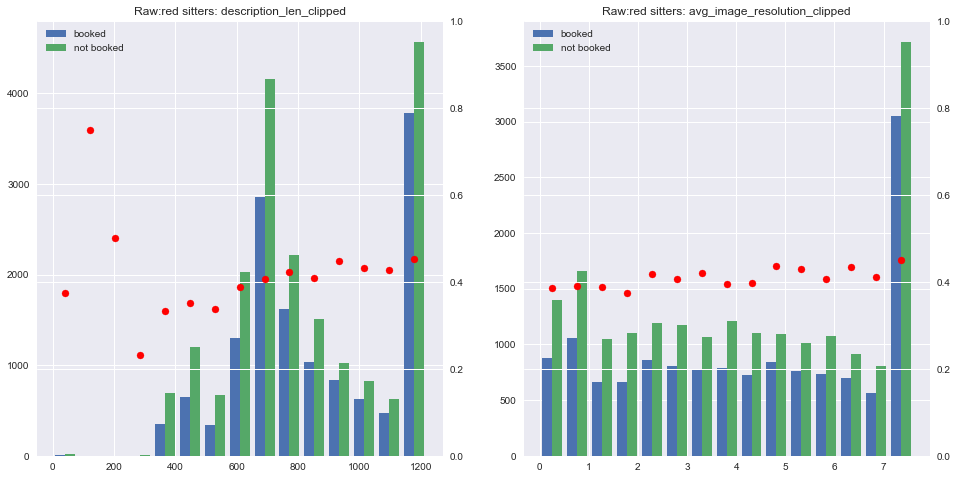

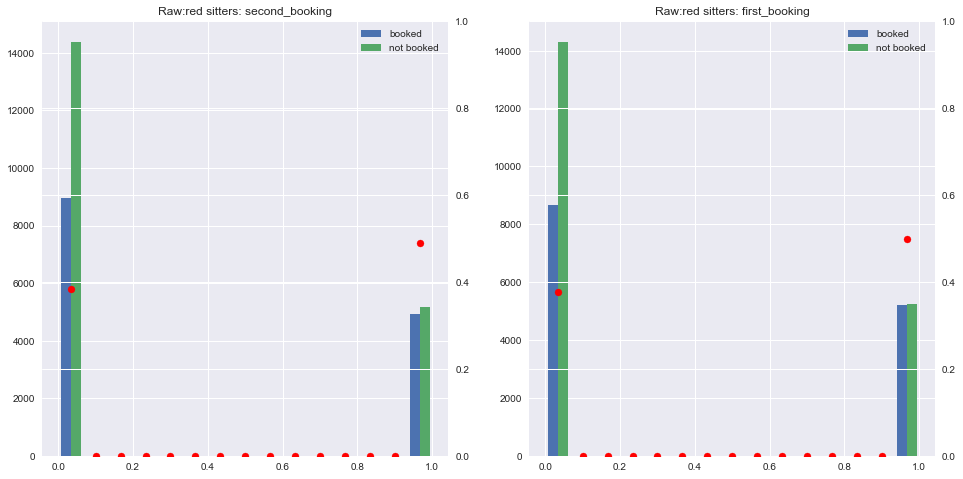

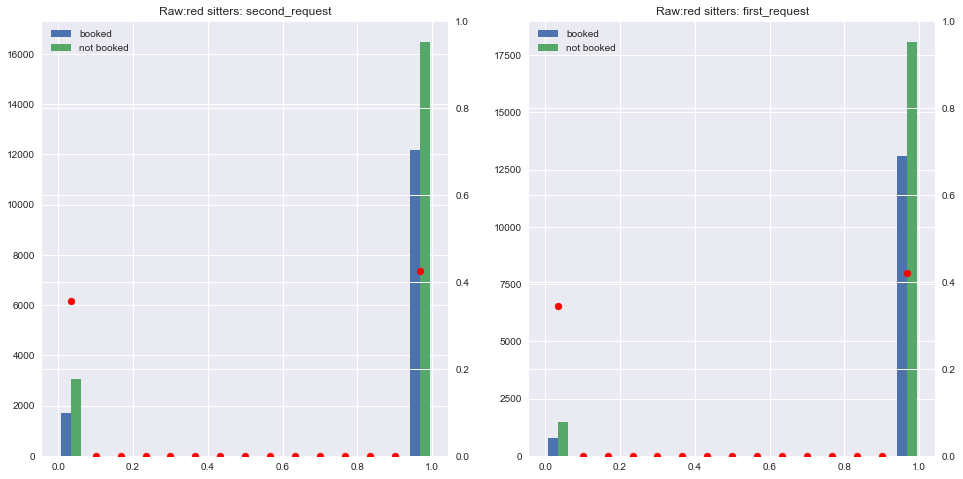

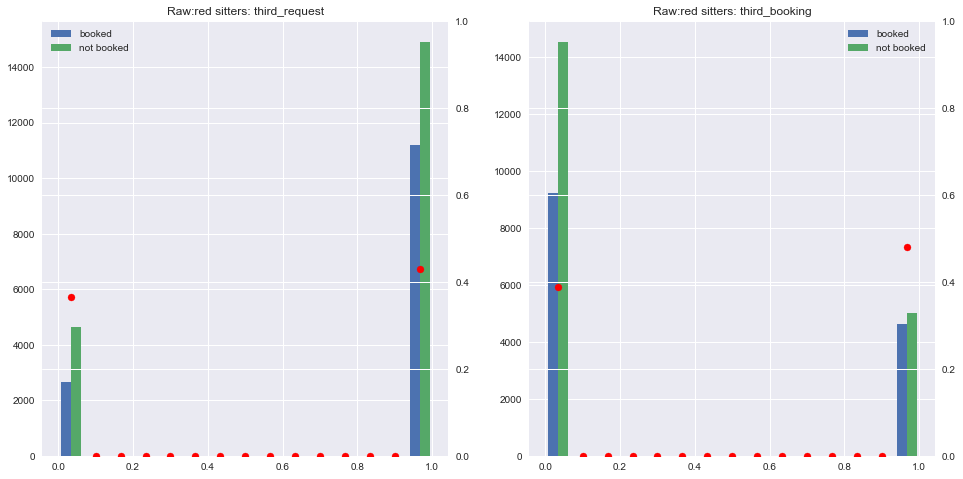

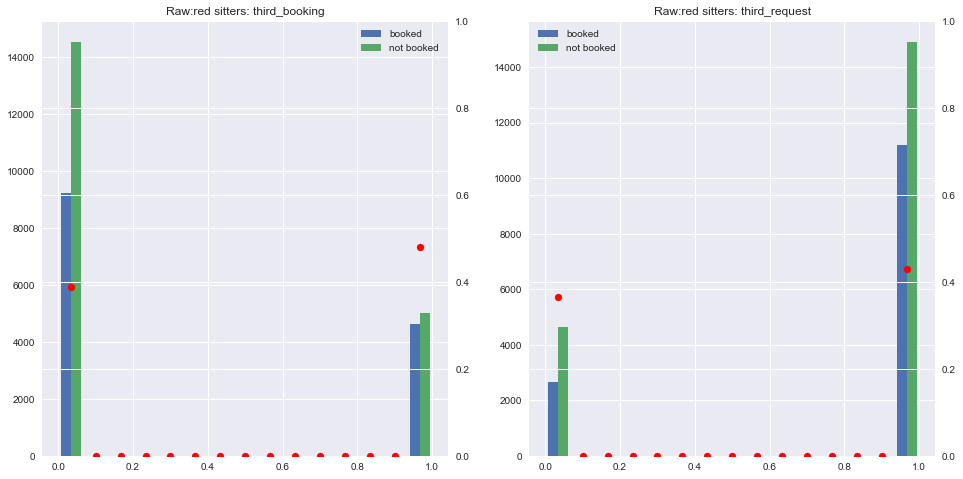

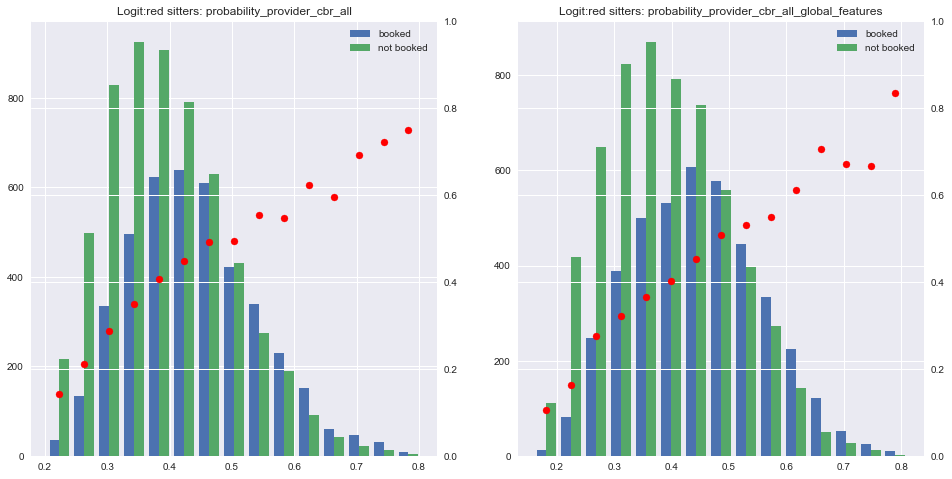

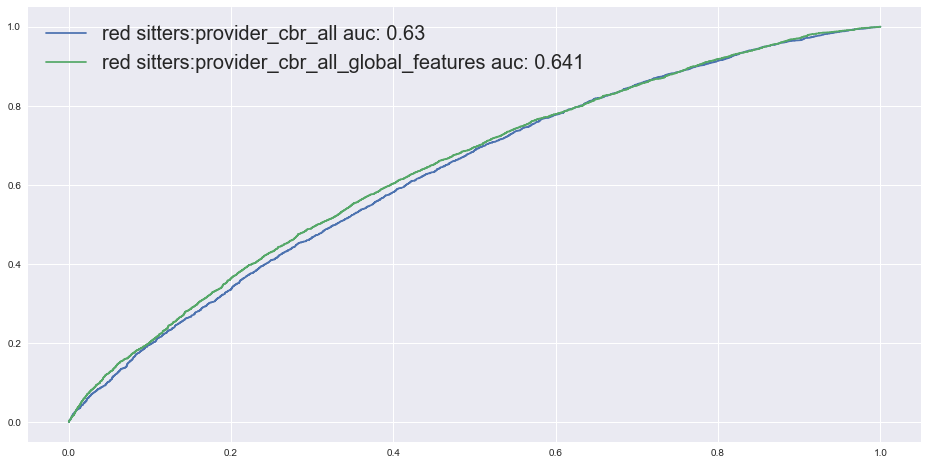

,auc,feature_name,status
1,0.641118,provider_cbr_all_global_features,seeding
0,0.568359,provider_cbr_all,seeding
1,0.658295,provider_cbr_all_global_features,green
0,0.627824,provider_cbr_all,green
1,0.640682,provider_cbr_all_global_features,red
0,0.630388,provider_cbr_all,red


In [25]:
from copy import deepcopy
from analytics_lib.compare_features import compare_features_disc_withlift_mul
df_auc_splittest = pd.DataFrame(columns=['status','feature_name','auc'])
df_predicted_splittest = pd.DataFrame(columns = ['status','booked','probability_provider_cbr_all','probability_provider_cbr_all_global_features'])
for status in ['seeding','green','red']:
    display('===========' + status + '===========')
    fea_col_list = list(deepcopy(feature_init[status]))
    display(fea_col_list)
    if 'provider_cbr_all' in fea_col_list:
        fea_col_list.remove('provider_cbr_all')
    sub_df_auc, lift, sub_df_predicted = compare_features_disc_withlift_mul(ob_dummy_filled_bygroup_clipped[ob_dummy_filled_bygroup_clipped.status==status],base_col='provider_cbr_all',fea_col_list=fea_col_list,fig_name=status+' sitters')
    sub_df_auc['status'] = status
    sub_df_predicted['status'] = status
    df_auc_splittest = df_auc_splittest.append(sub_df_auc)
    df_predicted_splittest = df_predicted_splittest.append(sub_df_predicted)
display(df_auc_splittest)


In [26]:
# evaluate the Logistic Regression model by splitting into train and test sets
def EvalLRModel(X,y,plot_name,penalty='l1',class_weight=None,no_bin=None,ylim=None):
    import analytics_lib
    from analytics_lib.Bucket_BR_Plot import Bucket_BR_Plot
    from sklearn.linear_model import LogisticRegression
    from sklearn.cross_validation import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20,stratify=y)
    model2 = LogisticRegression(penalty=penalty,class_weight=class_weight)
    model2.fit(X_train, y_train)
    
    if no_bin is None:
        no_bin = 15
    # predict class labels for the test set
    predicted = model2.predict(X_test)

    # generate class probabilities
    
    probs = model2.predict_proba(X_test)
    y_predicted_df = pd.concat([y_test,probs[:,1],predicted])
    y_predicted_df.columns = ['actural','predicted_probability','predicted']
    df=pd.DataFrame(probs[:,1])
    df = df.join(y_test.reset_index(drop=True))
    df.columns = ['probability','booked']
    h = Bucket_BR_Plot(df,'probability','booked',no_bin,plot_name, ylim) 
    
    fpr, tpr, _ = metrics.roc_curve(y_test, probs[:,1])
    df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
    plt.plot(df.fpr,df.tpr)
    plt.title(os.path.basename(plot_name).replace('.png','_ROC'))
    auc = metrics.roc_auc_score(y_test, probs[:,1])
    plt.text(0.5, 0.5,'roc auc is '+ str(auc),
     horizontalalignment='left',
     verticalalignment='center',
     )
    plt.show()
    
    print 'roc auc is ', metrics.roc_auc_score(y_test, probs[:,1])
    
    print metrics.classification_report(y_test, predicted)
    
    return auc,y_predicted_df


## Use logistic regression for further grooming with l1 penalty

In [27]:
def display_model_coef(feature_name, model,display_switch=True):
    from IPython.display import display,HTML

    list1 = ['intercept']+feature_name
    list2 = list(model.intercept_) + list(model.coef_[0])
    df = pd.DataFrame(zip(list1,list2))
    if (display_switch == True):
        display(HTML(df.to_html(index=False)))
    return df

In [28]:
feature_final = {'seeding':[],'green':[],'red':[]}
from copy import deepcopy
from sklearn.feature_selection import SelectFromModel
for status in ['red','green','seeding']:

    feature_col = deepcopy(list(feature_init[status]))
    X = ob_dummy_filled_bygroup_clipped[ob_dummy_filled_bygroup_clipped.status == status][feature_col]
    Y = ob_dummy_filled_bygroup_clipped[ob_dummy_filled_bygroup_clipped.status == status].booked
    model = LogisticRegression(penalty='l1',class_weight=None)
    model.fit(X,Y)

    fea_col_groomed = deepcopy(feature_col)
    for i,ele in enumerate(model.coef_[0]):
        if abs(ele) < 0.000000001e-5:
            display('getting rid of '+feature_col[i])
            fea_col_groomed.remove(fea_col_groomed[i])

    model2 = SelectFromModel(model, prefit=True)
    X_new = model.transform(X)
    model.fit(X_new,Y)

    print '===================' + status + '==================='
    display_model_coef(fea_col_groomed,model)
    feature_final[status] = fea_col_groomed  

/Users/wendyshi/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


===================red===================


0,1
intercept,-1.325450
provider_cbr_all,2.294462
avg_sitter_response_seconds_clipped,-0.004287
avg_service_response_seconds_clipped,0.390271
calendar_recency_clipped,0.009625
rover_imported_ratio_x_cbr,0.000212
avg_image_resolution_clipped,0.263955
description_len_clipped,0.168354
first_booking,-0.049114
second_booking,-0.008303


===================green===================


/Users/wendyshi/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


0,1
intercept,-0.998888
avg_sitter_response_seconds_clipped,-0.000017
description_len_clipped,0.000451
avg_service_response_seconds_clipped,-0.009327
calendar_recency_clipped,0.002580
avg_image_resolution_clipped,0.271015
provider_cbr_all,0.982105
rover_imported_ratio_x_cbr,0.000165
avg_testimonial_len_clipped,-0.001637
years_of_experience_clipped,0.011134


===================seeding===================


/Users/wendyshi/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


0,1
intercept,-1.434919
description_len_clipped,0.000812
avg_sitter_response_seconds_clipped,0.046993
avg_image_resolution_clipped,-0.012149
calendar_recency_clipped,0.000832
avg_testimonial_len_clipped,-0.000022
avg_service_response_seconds_clipped,0.010023
years_of_experience_clipped,0.008201
num_images_clipped,0.392583
first_booking,0.520618


In [29]:
color_dict = {'seeding':'black','green':'green','red':'red'}
from sklearn.externals import joblib

predicted_br = pd.DataFrame(columns=['conversation_id','status','global_booking_rate','booked','provider_cbr_all'])
from sklearn.feature_selection import SelectFromModel
for status in ['seeding','green','red']:
    model_name = os.path.join(data_dir,slug+'_'+status+'_model.pkl')

    fea = list(feature_final[status])
    X = ob_dummy_filled_bygroup_clipped[ob_dummy_filled_bygroup_clipped.status == status]
    Y = ob_dummy_filled_bygroup_clipped[ob_dummy_filled_bygroup_clipped.status == status].booked
    fea_df = X.copy()

    fea_file_name = os.path.join(data_dir,status+'_features_predicted_booking_rate_'+slug+'.csv')
    model_file_name = os.path.join(data_dir,'model_predicted_booking_rate_'+slug+'_'+status+'.csv')
    model = LogisticRegression(penalty='l1')
    
    if (reset_switch == False):
        display('loading model')
        model = joblib.load(model_name)
    else:
        display('fitting model')
        model.fit(X[fea],Y)
        display('saving model')
        joblib.dump(model,model_name, compress=('zlib', 9))
    
    sub = pd.DataFrame(columns=['conversation_id','status','global_booking_rate','booked'])
    sub['conversation_id'] = X['conversation_id']
    sub['global_booking_rate'] = model.predict_proba(X[fea])[:,1]
    sub['status'] = status
    sub['booked'] = Y
    fea_df =  X.copy()
    predicted_br = predicted_br.append(sub)
    print '===================' + status + '==================='
    fea_df.to_csv(fea_file_name)
    
    coef_df = display_model_coef(fea,model)
    coef_df.to_csv(model_file_name,header=False,index=False)

predicted_br.to_csv(os.path.join(data_dir,'predicted_booking_rate_'+slug+'.csv')) 

'fitting model'

'saving model'

===================seeding===================


0,1
intercept,-1.393255
description_len_clipped,0.000811
avg_sitter_response_seconds_clipped,-0.000009
avg_image_resolution_clipped,0.046252
calendar_recency_clipped,-0.012011
avg_testimonial_len_clipped,0.000824
avg_service_response_seconds_clipped,-0.000012
years_of_experience_clipped,0.009938
num_images_clipped,0.007927
first_booking,0.389653


'fitting model'

'saving model'

===================green===================


0,1
intercept,-1.006925
avg_sitter_response_seconds_clipped,-0.000015
description_len_clipped,0.000452
avg_service_response_seconds_clipped,-0.000006
calendar_recency_clipped,-0.009316
avg_image_resolution_clipped,0.002903
provider_cbr_all,0.987487
rover_imported_ratio_x_cbr,0.272285
avg_testimonial_len_clipped,0.000166
years_of_experience_clipped,-0.001692


'fitting model'

'saving model'

===================red===================


0,1
intercept,-1.197898
provider_cbr_all,1.839347
avg_sitter_response_seconds_clipped,-0.000003
avg_service_response_seconds_clipped,-0.000009
calendar_recency_clipped,-0.004276
rover_imported_ratio_x_cbr,0.705784
avg_image_resolution_clipped,0.007752
description_len_clipped,0.000212
first_booking,0.259437
second_booking,0.165276


In [30]:
color_dict = {'seeding':'black','green':'green','red':'red'}
from sklearn.externals import joblib

predicted_br = pd.DataFrame(columns=['conversation_id','status','global_booking_rate','booked','provider_cbr_all'])
from sklearn.feature_selection import SelectFromModel
for status in ['seeding','green','red']:
    model_name = os.path.join(data_dir,slug+'_'+status+'_model.pkl')

    fea = list(feature_final[status])
    X = ob_dummy_filled_bygroup_clipped[ob_dummy_filled_bygroup_clipped.status == status]
    Y = ob_dummy_filled_bygroup_clipped[ob_dummy_filled_bygroup_clipped.status == status].booked
    fea_df = X.copy()

    fea_file_name = os.path.join(data_dir,status+'_features_predicted_booking_rate_'+slug+'.csv')
    model_file_name = os.path.join(data_dir,'model_predicted_booking_rate_'+slug+'_'+status+'.csv')
    model = LogisticRegression(penalty='l1')
    
    if (os.path.exists(model_name)):
        display('loading model')
        model = joblib.load(model_name)
    else:
        display('fitting model')
        model.fit(X[fea],Y)
        display('saving model')
        joblib.dump(model,model_name, compress=('zlib', 9))
    
    sub = pd.DataFrame(columns=['conversation_id','status','global_booking_rate','booked'])
    sub['conversation_id'] = X['conversation_id']
    sub['global_booking_rate'] = model.predict_proba(X[fea])[:,1]
    sub['status'] = status
    sub['booked'] = Y
    fea_df =  X.copy()
    predicted_br = predicted_br.append(sub)
    print '===================' + status + '==================='
    fea_df.to_csv(fea_file_name)
    
    coef_df = display_model_coef(fea,model)
    coef_df.to_csv(model_file_name,header=False,index=False)

predicted_br.to_csv(os.path.join(data_dir,'predicted_booking_rate_'+slug+'.csv')) 

'loading model'

===================seeding===================


0,1
intercept,-1.393255
description_len_clipped,0.000811
avg_sitter_response_seconds_clipped,-0.000009
avg_image_resolution_clipped,0.046252
calendar_recency_clipped,-0.012011
avg_testimonial_len_clipped,0.000824
avg_service_response_seconds_clipped,-0.000012
years_of_experience_clipped,0.009938
num_images_clipped,0.007927
first_booking,0.389653


'loading model'

===================green===================


0,1
intercept,-1.006925
avg_sitter_response_seconds_clipped,-0.000015
description_len_clipped,0.000452
avg_service_response_seconds_clipped,-0.000006
calendar_recency_clipped,-0.009316
avg_image_resolution_clipped,0.002903
provider_cbr_all,0.987487
rover_imported_ratio_x_cbr,0.272285
avg_testimonial_len_clipped,0.000166
years_of_experience_clipped,-0.001692


'loading model'

===================red===================


0,1
intercept,-1.197898
provider_cbr_all,1.839347
avg_sitter_response_seconds_clipped,-0.000003
avg_service_response_seconds_clipped,-0.000009
calendar_recency_clipped,-0.004276
rover_imported_ratio_x_cbr,0.705784
avg_image_resolution_clipped,0.007752
description_len_clipped,0.000212
first_booking,0.259437
second_booking,0.165276


In [31]:
predicted_br = predicted_br.drop('provider_cbr_all',axis=1).merge(ob[['conversation_id','provider_cbr_all','provider_type']],on='conversation_id')

In [32]:
predicted_br.groupby(['status'])[['global_booking_rate','provider_cbr_all','booked']].agg(['count','max','min','mean','median','std'])

global_booking_rate                                                    \
                      count       max       min      mean    median       std   
status                                                                          
green                 19091  0.790631  0.106165  0.377289  0.369630  0.128984   
red                   33421  0.836280  0.155883  0.415119  0.407291  0.116413   
seeding                8848  0.809307  0.089798  0.363711  0.362886  0.115548   

        provider_cbr_all                                               
                   count       max  min      mean    median       std  
status                                                                 
green              19091  0.980000  0.0  0.306323  0.290000  0.208191  
red                33421  0.834286  0.0  0.293009  0.284082  0.128224  
seeding             7427  0.980000  0.0  0.304014  0.000000  0.375101

In [33]:
predicted_br.groupby(['provider_type'])[['global_booking_rate','provider_cbr_all','booked']].agg(['count','max','min','mean','median','std'])

global_booking_rate                                \
                                  count       max       min      mean   
provider_type                                                           
merged                             4948  0.791362  0.124956  0.410650   
migrated                           2112  0.772209  0.119661  0.396650   
rover                             48761  0.836280  0.089966  0.395546   
rover-havent-merged                5539  0.770446  0.089798  0.385950   

                                        provider_cbr_all                       \
                       median       std            count   max  min      mean   
provider_type                                                                   
merged               0.404699  0.105947             4938  0.98  0.0  0.281473   
migrated             0.386094  0.106890             2086  0.98  0.0  0.295986   
rover                0.388830  0.124468            47404  0.98  0.0  0.303797   
rover-havent-merged  0.379418  0.120237             5511  0.98  0.0  0.270377   

                                         
                       median       std  
provider_type                            
merged               0.275868  0.118769  
migrated             0.287235  0.175833  
rover                0.287143  0.212638  
rover-havent-merged  0.261333  0.159161

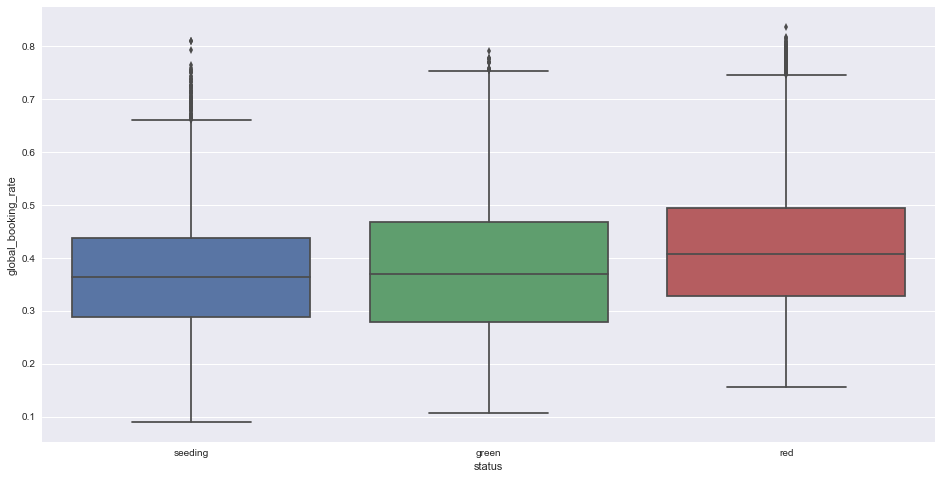

In [34]:
import seaborn as sns 
sns.boxplot(predicted_br['status'], predicted_br['global_booking_rate']) #Variable Plot
plt.show()

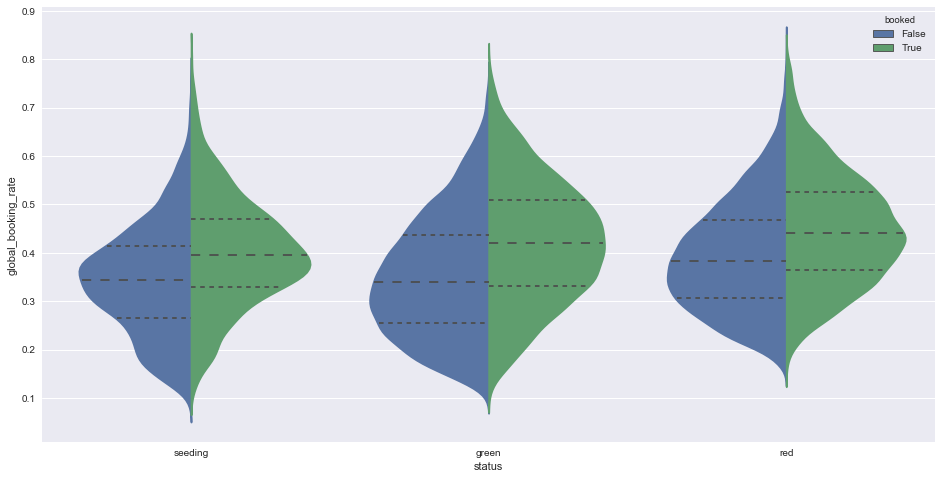

In [35]:
sns.violinplot(x='status', y ='global_booking_rate', hue="booked", data=predicted_br, split=True,
               inner="quart")
sns.despine(left=True)
plt.show()

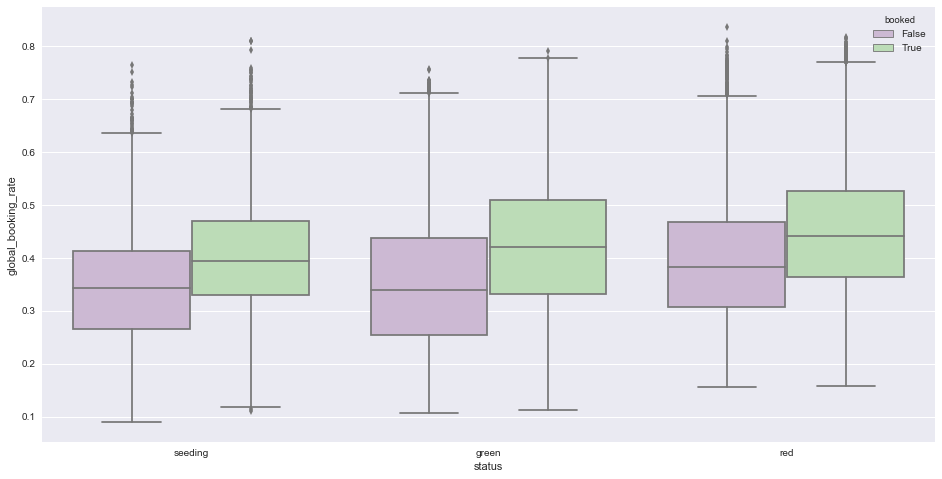

In [36]:
sns.boxplot(x='status', y ='global_booking_rate', hue="booked", data=predicted_br, palette="PRGn")
sns.despine(left=True)
plt.show()

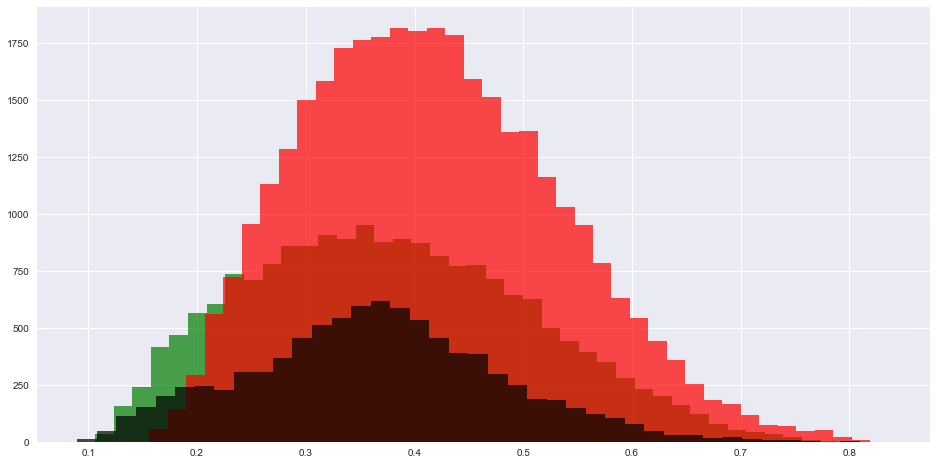

In [37]:
color_dict = {'seeding':'black','green':'green','red':'red'}
for status,color in color_dict.items():
    sub = predicted_br[predicted_br.status == status].global_booking_rate
    plt.hist(sub,normed=0,alpha=0.7,color=color,bins=40,histtype='bar', stacked=False)
plt.show()